 #                                         CAPSTONE PROJECT

# Predicting Mental Health in Tech workplace

In [1]:
# importting reguired libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
pd.options.display.max_columns=None

In [3]:
# importing dataset
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## DATA UNDERSTANDING

### Columns in dataset:
**•Timestamp**<br>
**• Age**<br>
**• Gender**<br>
**• Country**<br>
**• state** : If you live in the United States, which state or territory do you live in?<br>
**• self_employed** : Are you self-employed?<br>
**• family_history** : Do you have a family history of mental illness?<br>
**• treatment** : Have you sought treatment for a mental health condition?<br>
**• work_interfere** : If you have a mental health condition, do you feel that it interferes with your work?<br>
**• no_employees** : How many employees does your company or organization have?<br>
**• remote_work** : Do you work remotely (outside of an office) at least 50% of the time?<br>
**• tech_company** : Is your employer primarily a tech company/organization?<br>
**• benefits** : Does your employer provide mental health benefits?<br>
**• care_options** : Do you know the options for mental health care your employer provides?<br>
**• wellness_program** : Has your employer ever discussed mental health as part of an employee wellness program?<br>
**• seek_help** : Does your employer provide resources to learn more about mental health issues and how to seek help?<br>
**• anonymity** : Is your anonymity protected if you choose to take advantage of mental health or substance abuse treat<br>
**• leave** : How easy is it for you to take medical leave for a mental health condition?<br>
**• mentalhealthconsequence** : Do you think that discussing a mental health issue with your employer would have negative consequences<br>
**• physhealthconsequence** : Do you think that discussing a physical health issue with your employer would have negative consequences<br>
**• coworkers** : Would you be willing to discuss a mental health issue with your coworkers?<br>
**• supervisor** : Would you be willing to discuss a mental health issue with your direct supervisor(s)?<br>
**• mentalhealthinterview** : Would you bring up a mental health issue with a potential employer in an interview? <br>
**• physhealthinterview** : Would you bring up a physical health issue with a potential employer in an interview?<br>
**• mentalvsphysical** : Do you feel that your employer takes mental health as seriously as physical health?<br>
**• obs_consequence** : Have you heard of or observed negative consequences for coworkerswith mental health conditions<br>
**• comments**    


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

There 2 columns in total, out of we have only are numeric datatype and remaining 26 columns are object data type.<br>
Out of the 26 object datatype columns, 24 columns are catergorical variables.

In [5]:
# Description about the numeric column
df.describe().applymap('{:,.2f}'.format)

,Age
count,"1,259.00"
mean,"79,428,148.31"
std,"2,818,299,442.98"
min,"-1,726.00"
25%,27.00
50%,31.00
75%,36.00
max,"99,999,999,999.00"


There are 1259 entries in the age column.The maximun and minimum age values doesnot make sense. Hence we have to check for garbage values in the column

In [6]:
# Description of object type variables
df.describe(include='object')

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,1246,49,48,45,2,2,2,4,6,2,2,3,3,3,3,3,5,3,3,3,3,3,3,3,2,160
top,2014-08-27 12:44:51,Male,United States,CA,No,No,Yes,Sometimes,6-25,No,Yes,Yes,No,No,No,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,2,615,751,138,1095,767,637,465,290,883,1031,477,501,842,646,819,563,490,925,774,516,1008,557,576,1075,5


The column Gender has 49 unique entries. We will look into that further.<br>
The few columns seems to have null values. Depending upon the null value percentage of each column and the value it adds to the dataset, we take appropritae actions further.

### Check for null values

In [7]:
# Percentage of null values in each column
((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

comments                     86.973789
state                        40.905481
work_interfere               20.969023
self_employed                 1.429706
seek_help                     0.000000
obs_consequence               0.000000
mental_vs_physical            0.000000
phys_health_interview         0.000000
mental_health_interview       0.000000
supervisor                    0.000000
coworkers                     0.000000
phys_health_consequence       0.000000
mental_health_consequence     0.000000
leave                         0.000000
anonymity                     0.000000
Timestamp                     0.000000
wellness_program              0.000000
Age                           0.000000
benefits                      0.000000
tech_company                  0.000000
remote_work                   0.000000
no_employees                  0.000000
treatment                     0.000000
family_history                0.000000
Country                       0.000000
Gender                   

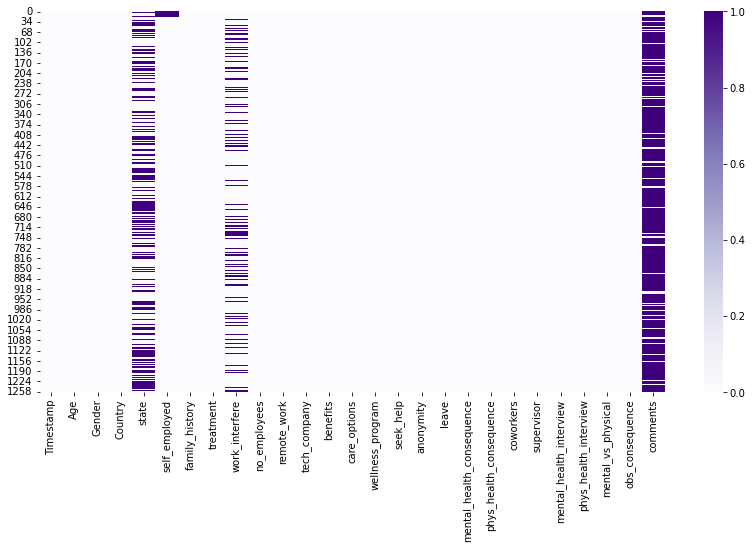

In [8]:
# plotting the null values in heatmap
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),cmap='Purples')
plt.show()

The column comments has comments 87% null values. Hence we drop the column.<br>
The column state has 41% null values and it is not adding significant information to the dataset. Hence we drop the column.<br>
The column work interfere has 21 % null values. This column adds significant information, hence we replace the null values with the mode of the column.<br>
The column self employed has only 1.4% missing value. This also replaced with mode values.

### Check for duplicate values

In [9]:
df.duplicated().sum()

0

There are no duplicated values present in the dataset

## DATA PREPROCESSING

Here we perform preprocession to drop the redundant columns and clean the data from garbage values

In [10]:
# Droping the columns timestamp, state, comments
df.drop(columns=['Timestamp', 'state', 'comments'],axis=1,inplace=True)

In [11]:
df.head(2)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No


Cleaning the data from garbage values

Checking the column Age

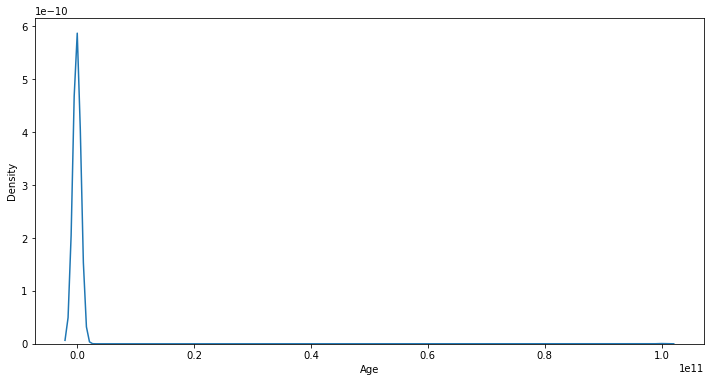

In [12]:
plt.figure(figsize=(12,6))
sns.kdeplot(x=df['Age'])
plt.show()

There are age values greate than 100 and negative values, which is not possible. Removing the age values greater than 80 and less than 13.(As the official age to work part time in  UK and USA is 13 and 14 respectively).

In [13]:
age_mismatch  = df[(df['Age']>80) | (df['Age']<13)].index

In [14]:
df.drop(index=age_mismatch,axis=0,inplace=True)

The column Gender has 49 unique values. For the sake of simplicity we categorise them into Male, Female and Others.

In [15]:
df.shape

(1251, 24)

In [16]:
df.Gender.unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

In [17]:
df['Gender'] = df['Gender'].replace({'male':'Male','M':'Male','m':'Male','Make':'Male','Man':'Male','Malr':'Male',
                'Male (CIS)':'Male','Male ':'Male','Cis Male':'Male','Mail':'Male','Cis Male':'Male','cis male':'Male',
                'msle':'Male','Cis Man':'Male','maile':'Male','Mal':'Male',
                'female':'Female','F':'Female','f':'Female','Woman':'Female','Femake':'Female','Female ':'Female',
                'femail':'Female', 'Female (cis)':'Female','woman':'Female','cis-female/femme':'Female','Cis Female':'Female',
                'Female (trans)':'Others','Androgyne':'Others','queer':'Others','Neuter':'Others',
                'Trans woman':'Others','fluid':'Others','non-binary':'Others','queer/she/they':'Others','Enby':'Others',
                'Trans-female':'Female','Genderqueer':'Others','Agender':'Others','something kinda male?':'Others','Male-ish':'Others','ostensibly male, unsure what that really means':'Others',
                'Nah':'Others','Guy (-ish) ^_^':'Others','male leaning androgynous':'Others','A little about you':'Others'})

In [18]:
df.Gender.unique()

array(['Female', 'Male', 'Others'], dtype=object)

## EXPLORATORY DATA ANALYSIS

### Univariant Analysis

In [19]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Age

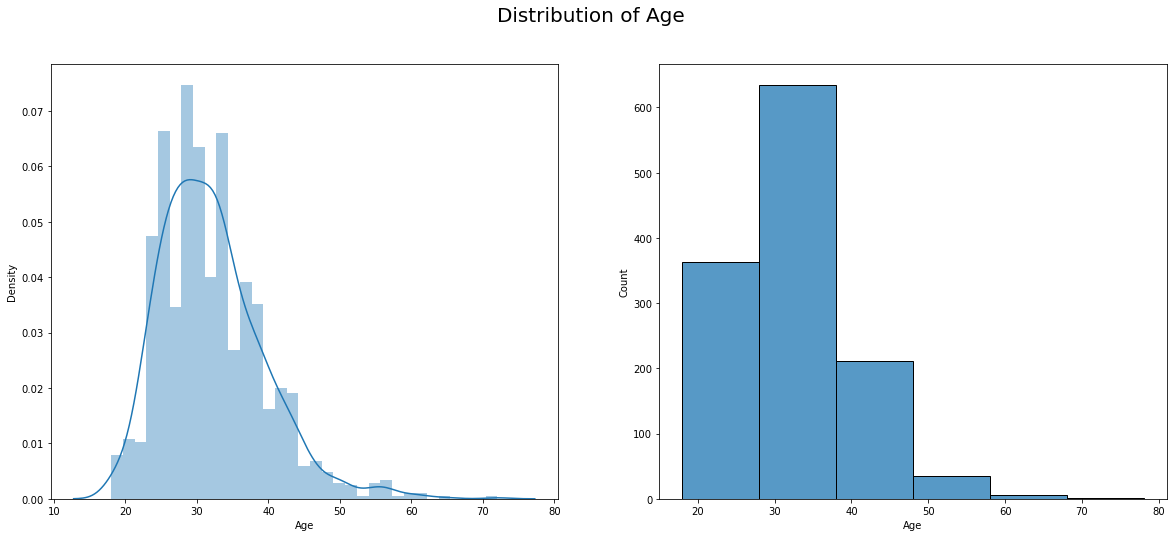

In [20]:
plt.subplots(1,2,figsize=(20,8))

plt.subplot(121)
sns.distplot(x=df['Age'])
plt.xlabel('Age')


plt.subplot(122)
sns.histplot(x=df.Age,binwidth=10)

plt.suptitle ('Distribution of Age',fontsize=20)
plt.show()

Majority employees age is in their 30's. The column age is right skewed. 

### Gender

In [21]:
df.Gender.value_counts()

Male      985
Female    248
Others     18
Name: Gender, dtype: int64

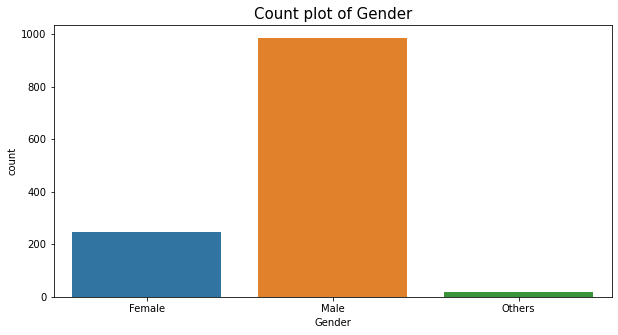

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['Gender'])
plt.title('Count plot of Gender',fontsize=15)
plt.show()

Majority of them employees are male. Other gender group is the minority genger 

### Country

In [23]:
df.Country.value_counts()

United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Czech Repu

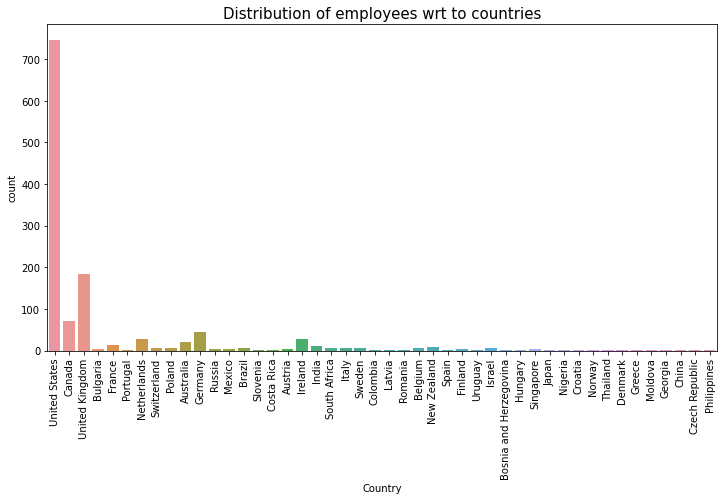

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Country'])
plt.xticks(rotation=90)
plt.title('Distribution of employees wrt to countries',fontsize=15)
plt.show()

In [25]:
df.Country.nunique()

46

The are employees from 46 countries who have taken the survey. 50% of the people are from United states. There are also significant employees from United Kingdom and Canada.

### Self employed

In [26]:
df.self_employed.value_counts()

No     1091
Yes     142
Name: self_employed, dtype: int64

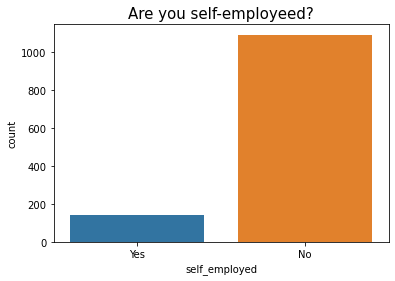

In [27]:
sns.countplot(x=df['self_employed'])
plt.title('Are you self-employeed?',fontsize=15)
plt.show()

Majority (80%) of the people work for others

### Family history

In [28]:
df.family_history.value_counts()

No     762
Yes    489
Name: family_history, dtype: int64

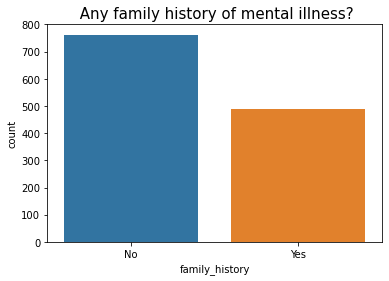

In [29]:
sns.countplot(x=df['family_history'])
plt.title(' Any family history of mental illness?',fontsize=15)
plt.show()

60% of the employees have no family history mental illness

###  Treatment

In [30]:
df.treatment.value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

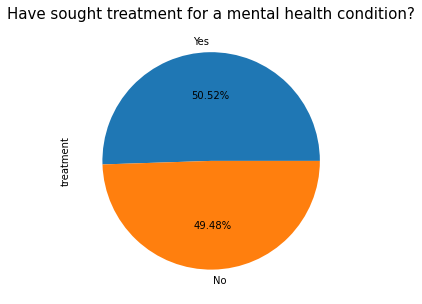

In [31]:
plt.figure(figsize=(10,5))
df.treatment.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Have sought treatment for a mental health condition?',fontsize=15)
plt.show()

50% employeses Have sought treatment for a mental health condition

###  Work interfere

In [32]:
df.work_interfere.value_counts()

Sometimes    464
Never        212
Rarely       173
Often        140
Name: work_interfere, dtype: int64

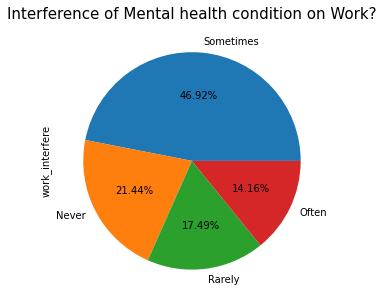

In [33]:
plt.figure(figsize=(10,5))
df.work_interfere.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Interference of Mental health condition on Work?',fontsize=15)
plt.show()

78 % of employees have experienced some sort of work interference due to mental illness

### No_employees

In [34]:
df.no_employees.value_counts()

6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: no_employees, dtype: int64

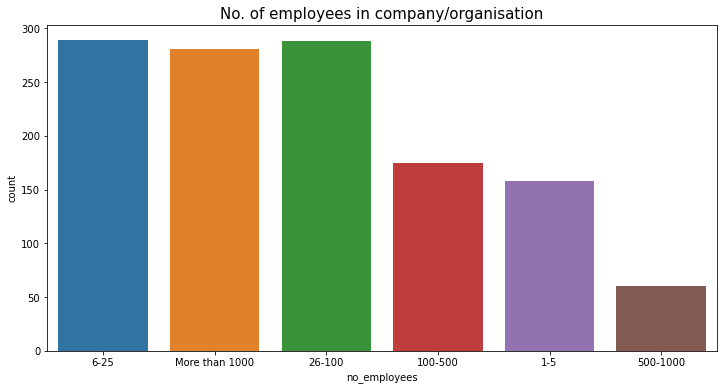

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x=df.no_employees)
plt.title('No. of employees in company/organisation',fontsize=15)
plt.show()

Most people work in a small employerss group(<100) and followed by large group(>1000) employees

### Remote work

In [36]:
df.remote_work.value_counts()

No     880
Yes    371
Name: remote_work, dtype: int64

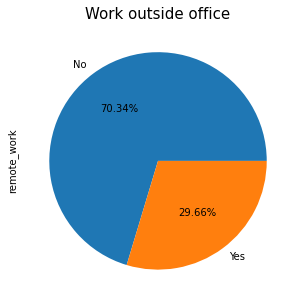

In [37]:
plt.figure(figsize=(10,5))
df.remote_work.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Work outside office',fontsize=15)
plt.show()

 Only 30% of people are able to work remotely

### Tech company

In [38]:
df.tech_company.value_counts()

Yes    1025
No      226
Name: tech_company, dtype: int64

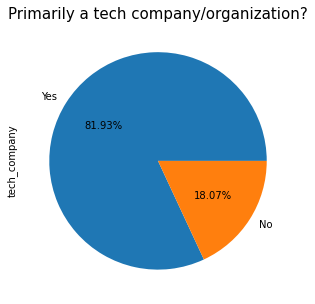

In [39]:
plt.figure(figsize=(10,5))
df.tech_company.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Primarily a tech company/organization?',fontsize=15)
plt.show()

82% of employer is primarily a tech company/organization

### Benefits

In [40]:
df.benefits.value_counts()

Yes           473
Don't know    407
No            371
Name: benefits, dtype: int64

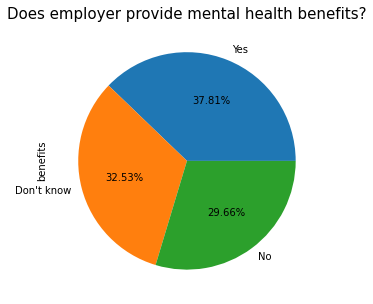

In [41]:
plt.figure(figsize=(10,5))
df.benefits.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Does employer provide mental health benefits?',fontsize=15)
plt.show()

38% of employees have been provided with mental health benifits 
32% of employeers don't know about the mental helath benifits provided by the employeers. Which shows the lack of awarness

### Care options

In [42]:
df.care_options.value_counts()

No          499
Yes         439
Not sure    313
Name: care_options, dtype: int64

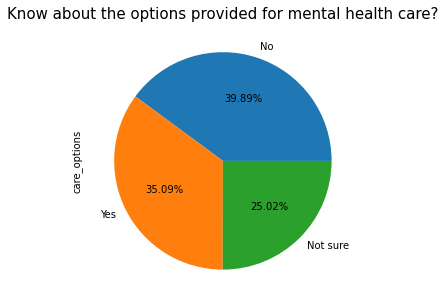

In [43]:
plt.figure(figsize=(10,5))
df.care_options.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Know about the options provided for mental health care?',fontsize=15)
plt.show()

Only 35% of employees know about the options for mental health care their employer provides.
This shows lack of awarness amoung employees

### Wellness program

In [44]:
df.wellness_program.value_counts()

No            837
Yes           227
Don't know    187
Name: wellness_program, dtype: int64

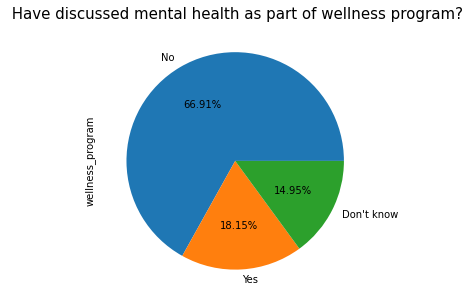

In [45]:
plt.figure(figsize=(10,5))
df.wellness_program.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title(' Have discussed mental health as part of wellness program?',fontsize=15)
plt.show()

67% of employer have not discussed mental health as part of an employee wellness program.
 Mental health is not given as much importance as physical health by employess

###  Seek help

In [46]:
df.seek_help.value_counts()

No            641
Don't know    363
Yes           247
Name: seek_help, dtype: int64

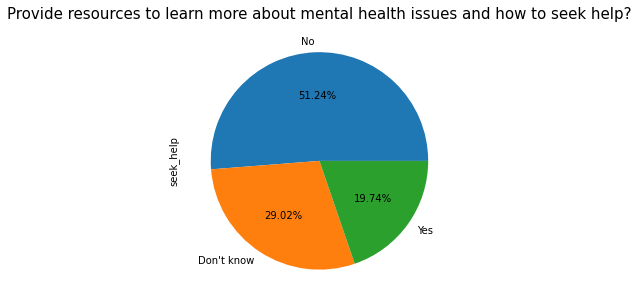

In [47]:
plt.figure(figsize=(10,5))
df.seek_help.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Provide resources to learn more about mental health issues and how to seek help?',fontsize=15)
plt.show()

Only 20% of employers provide resources to learn more about mental health issues and how to seek help

### Anonymity 

In [48]:
df.anonymity.value_counts()

Don't know    815
Yes           372
No             64
Name: anonymity, dtype: int64

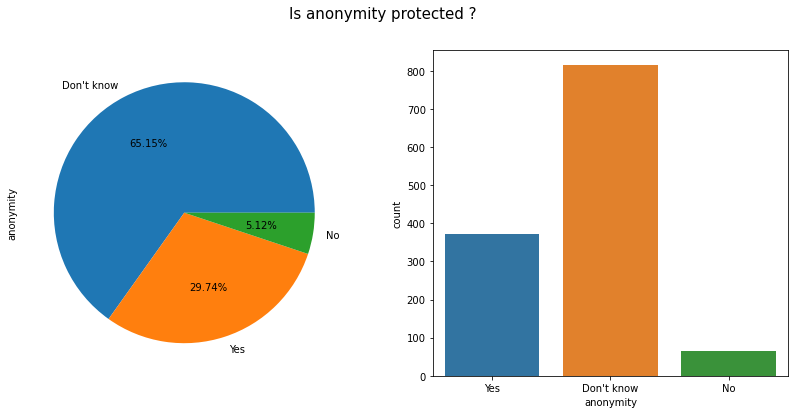

In [49]:
plt.subplots(1,2,figsize=(14,6))

plt.subplot(121)
df.anonymity.value_counts().plot(kind='pie',autopct='%0.2f%%')

plt.subplot(122)
sns.countplot(x=df.anonymity)

plt.suptitle('Is anonymity protected ? ', fontsize=15)
plt.show()

65% of employees are unaware about anaonymity protection provided by employers
Out of aware employees, majority of the employers provide anonymity protection

### Leave 

In [50]:
df.leave.value_counts()

Don't know            561
Somewhat easy         265
Very easy             203
Somewhat difficult    125
Very difficult         97
Name: leave, dtype: int64

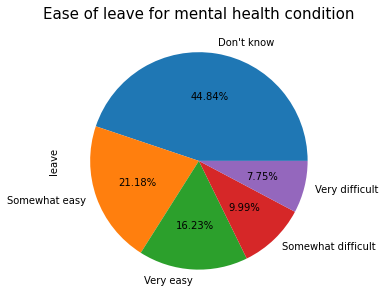

In [51]:
plt.figure(figsize=(10,5))
df.leave.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Ease of leave for mental health condition',fontsize=15)
plt.show()

45% of the employees are ignorant about the easy of leave to take leave for medical health conditions
Out of the known employees, majority of employees have ease in applying leave for mental health conditions

### Mental Health Consequence
       

In [52]:
df.mental_health_consequence.value_counts()

No       487
Maybe    476
Yes      288
Name: mental_health_consequence, dtype: int64

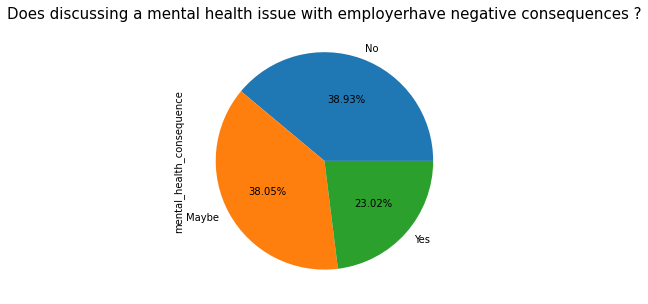

In [53]:
plt.figure(figsize=(10,5))
df.mental_health_consequence.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Does discussing a mental health issue with employerhave negative consequences ?',fontsize=15)
plt.show()

39% of employees think that discussing a mental health issue with your employer would not have negative consequences
But 38% of employees  think that discussing a mental health issue with your employer would have negative consequences which shows the stigma around mental health

### Physical Health Consequence

In [54]:
df.phys_health_consequence.value_counts()

No       920
Maybe    273
Yes       58
Name: phys_health_consequence, dtype: int64

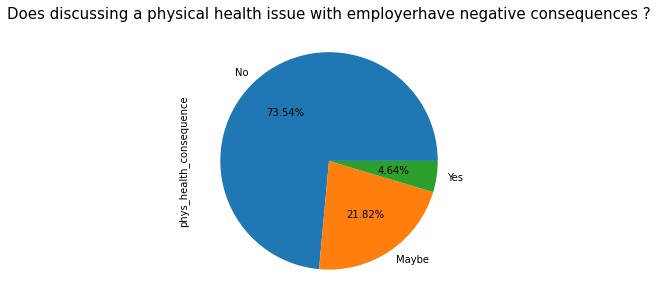

In [55]:
plt.figure(figsize=(10,5))
df.phys_health_consequence.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Does discussing a physical health issue with employerhave negative consequences ?',fontsize=15)
plt.show()

74% of employees think that discussing a physical health issue with your employer would have no negative consequences
This shows that majority of employees have no problem in discussing physical health with employers

###  Coworkers 

In [56]:
df.coworkers.value_counts()

Some of them    771
No              258
Yes             222
Name: coworkers, dtype: int64

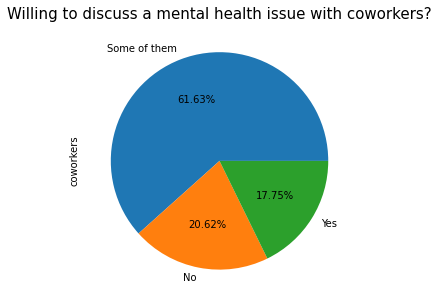

In [57]:
plt.figure(figsize=(10,5))
df.coworkers.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Willing to discuss a mental health issue with coworkers?',fontsize=15)
plt.show()

Only 18 % of the employees are willing to discuss a mental health issue with coworkers
61.5 % of the employees are willing to discuss a mental health issue with some of the coworkers meaning that they are willing to openly dicuss it with everyone

### Supervisor
       

In [58]:
df.supervisor.value_counts()

Yes             512
No              390
Some of them    349
Name: supervisor, dtype: int64

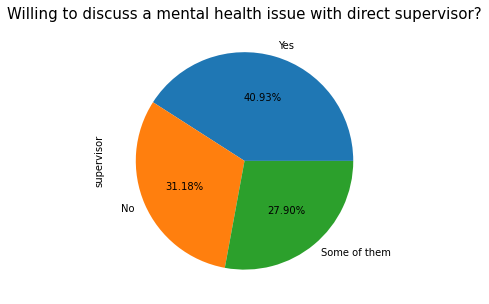

In [59]:
plt.figure(figsize=(10,5))
df.supervisor.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Willing to discuss a mental health issue with direct supervisor?',fontsize=15)
plt.show()

41% of employees are willing to discuss a mental health issue with your direct supervisor(s), which is a good sign
31% of employees are not willing to discuss a mental health issue with your direct supervisor(s)

### Mental Health Interview

In [60]:
df.mental_health_interview.value_counts()

No       1003
Maybe     207
Yes        41
Name: mental_health_interview, dtype: int64

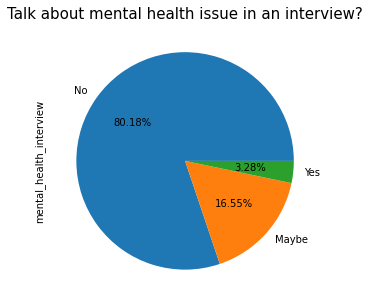

In [61]:
plt.figure(figsize=(10,5))
df.mental_health_interview.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Talk about mental health issue in an interview?',fontsize=15)
plt.show()

80% of employees are not willing to bring up a mental health issue with a potential employer in an interview.
Only 3%  of employees are willing to bring up a mental health issue with a potential employer in an interview.
16.5% of employees are open to bring up a mental health issue with a potential employer in an interview.
This show the stigma around mental health.

###  Physical Health Interview
       

In [62]:
df.phys_health_interview.value_counts()

Maybe    555
No       496
Yes      200
Name: phys_health_interview, dtype: int64

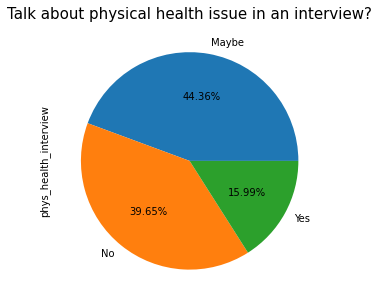

In [63]:
plt.figure(figsize=(10,5))
df.phys_health_interview.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Talk about physical health issue in an interview?',fontsize=15)
plt.show()

Only 40% of employees are not willing to bring up a physical health issue with a potential employer in an interview which is half of the people are not willing to bring up a mental health issue with a potential employer in an interview.
16% of employees are willing to bring up a physical health issue with a potential employer in an interview which is 5 times that of mental health issues interview.
44% of employees are open to bring up a physical health issue with a potential employer in an interview.
This shows discrimination between physical and mental health issues in employees view.

### Mental vs Physical 

In [64]:
df.mental_vs_physical.value_counts()

Don't know    574
Yes           339
No            338
Name: mental_vs_physical, dtype: int64

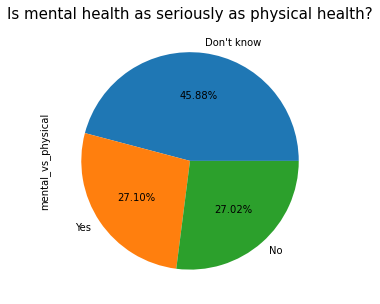

In [65]:
plt.figure(figsize=(10,5))
df.mental_vs_physical.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Is mental health as seriously as physical health?',fontsize=15)
plt.show()

46 % of employees don't know about the opinion of employer.Remaining employees have  uniform opinion abouthow their employers takes mental health as seriously as physical health. 

### Observed Consequence

In [66]:
df.obs_consequence.value_counts()

No     1070
Yes     181
Name: obs_consequence, dtype: int64

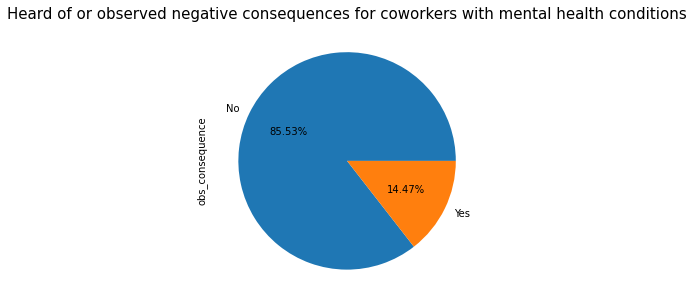

In [67]:
plt.figure(figsize=(10,5))
df.obs_consequence.value_counts().plot(kind='pie',autopct='%0.2f%%')
plt.title('Heard of or observed negative consequences for coworkers with mental health conditions',fontsize=15)
plt.show()

85.5% of employees have not heard of or observed negative consequences for coworkers with mental health conditions.
Shows that mental health of a person is not affecting coworkers.

### Bivariant Analysis

### Age Vs Gender

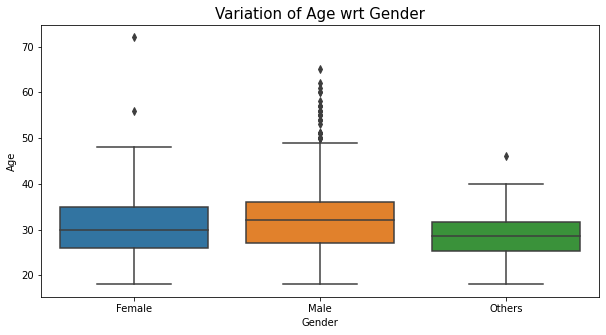

In [68]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.Gender,y=df.Age)
plt.title('Variation of Age wrt Gender',fontsize=15)
plt.show()

The  age of male employees has higher median , we can say that on average age of male employee is higher.<br> 
Minumum age of female n nale employee facing health issue is 20


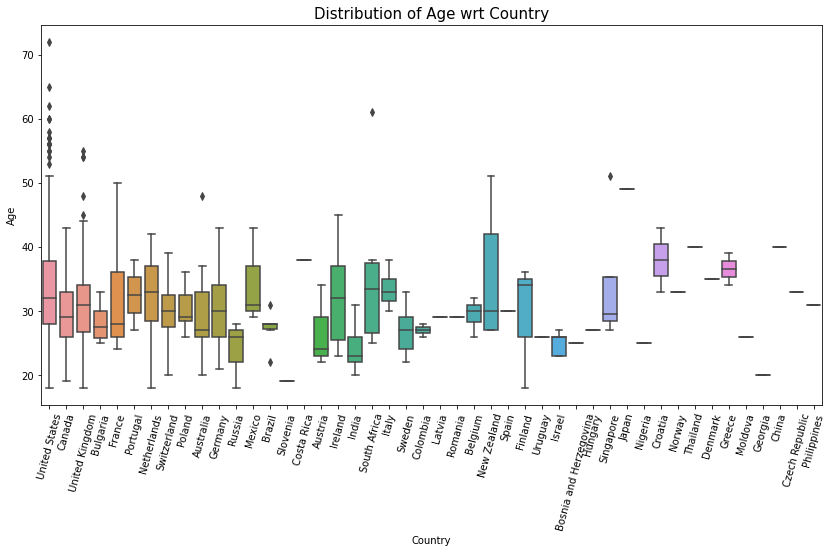

In [69]:
plt.figure(figsize=(14,7))
sns.boxplot(x=df.Country,y=df.Age)
plt.xticks(rotation=75)
plt.title('Distribution of Age wrt Country',fontsize=15)
plt.show()

Employees with age >50 are from USA. USA has the maximum age interval of employees. This may be due to a more number of responses from USA.

### Age Vs Self Employed

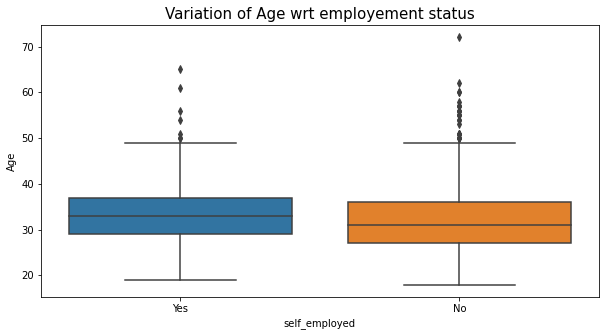

In [70]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.self_employed,y=df.Age)
plt.title('Variation of Age wrt employement status',fontsize=15)
plt.show()

The age of self-employed employees has higher median , we can say that on average age of self-employed employee is higher<br>Age of self-employed Employees ranges from 20 to 60 above.<br>Age of on self-employed Employees ranges 20 to 60

### Age Vs Family History

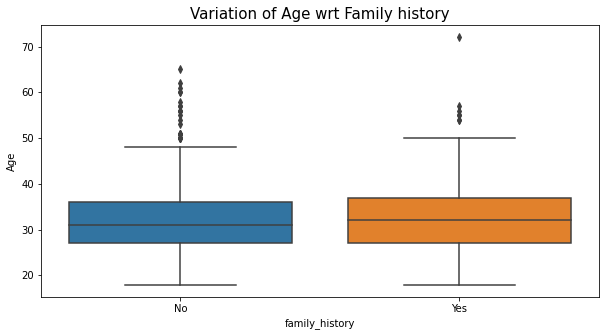

In [71]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['family_history'],y=df['Age'])
plt.title('Variation of Age wrt Family history',fontsize=15)
plt.show()

The age of employees with  family history 0f mental health is slighly  higher median ,thus we can say that average age of employee having no family history id 35.
The overall range for the employess with no family history is higher but the IQR has lower values.  

### Age Vs Treatment

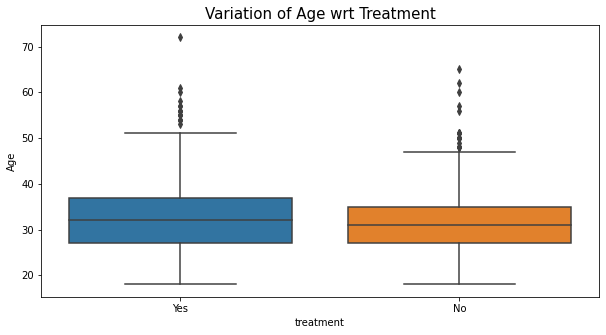

In [72]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.treatment,y=df.Age)
plt.title('Variation of Age wrt Treatment',fontsize=15)
plt.show()

The average age of  employees  who have sought their treatment is slighly higher.<br>
Age of employee who have not sought their treatment can be above 60

### Age Vs Work_interfere

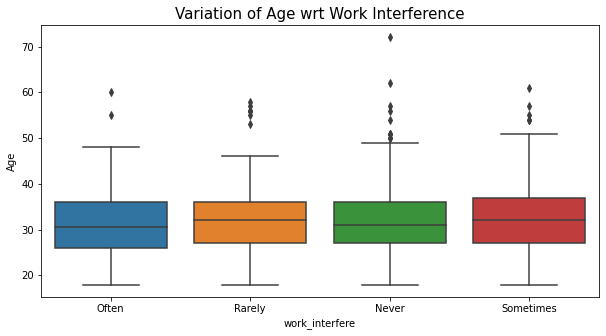

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.work_interfere,y=df.Age)
plt.title('Variation of Age wrt Work Interference',fontsize=15)
plt.show()

Employees who has never faced work interference are of slightly lower age 

### Age Vs No of Employees

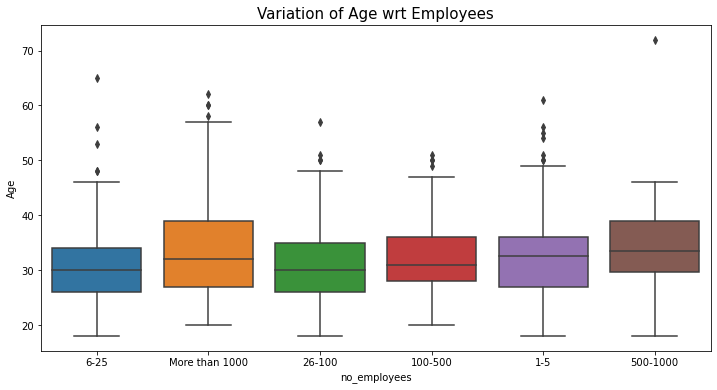

In [74]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.no_employees,y=df.Age)
plt.title('Variation of Age wrt Employees',fontsize=15)
plt.show()

The average age of  employees in organization having more than 1000 employees is  higher.<br>
Maximun age of employee in organization having more than 1000 employees ranges upto 60.<br>
Maximun age of employee in organization having 6-25 employees ranges above 60

### Age Vs Remote work

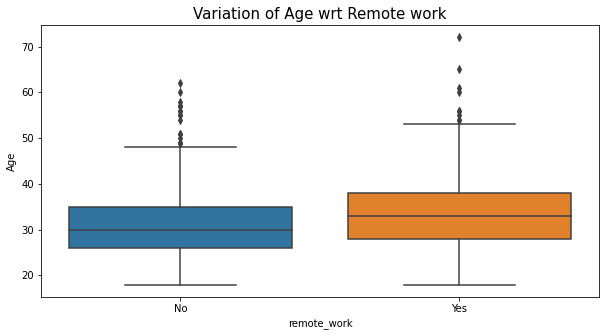

In [75]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.remote_work,y=df.Age)
plt.title('Variation of Age wrt Remote work',fontsize=15)
plt.show()

The average age of  employees  work remotely (outside of an office) is slighly higher.<br>
Age of employees who are allowed to work remotely are above

### Age Vs Tech Company

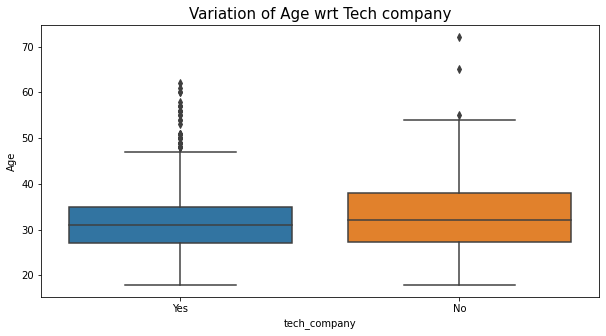

In [76]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tech_company,y=df.Age)
plt.title('Variation of Age wrt Tech company',fontsize=15)
plt.show()

On average the employees whose employers are not  a tech company/organization  have high age <br>
Minimum age of employee whose employers are not  a tech company/organization is 20 

### Age Vs Benefits

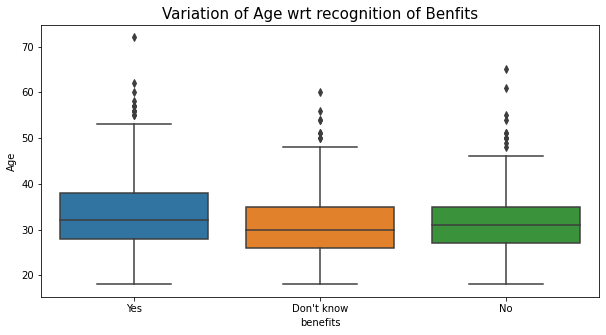

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.benefits,y=df.Age)
plt.title('Variation of Age wrt recognition of Benfits',fontsize=15)
plt.show()

On an average the age of employees who know about the mental helath benifits provided by the employeer is higher.<br> 
The centre of distribution Yes is the highest of the three distributions (median is 32).The distribution  is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.<br>
Majority of employes above age 55 know about the mental helath benifits provided by the employeer is higher.


### Age Vs Care options

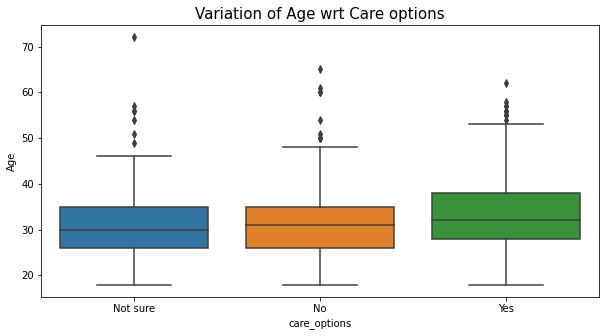

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.care_options,y=df.Age)
plt.title('Variation of Age wrt Care options',fontsize=15)
plt.show()

On an average the age of employees who know about the mental helath care options provided by the employeer is higher.<br>
The centre of distribution Yes is the highest of the three distributions (median is 32).The distribution  is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.<br>
Distribution of age of employees who are not sure and dont know about careoptions  is approximately symmetric, because both half-boxes are almost the same.<br> 
Age employees who dont know about gealth care options ranges above 60.

### Age Vs Wellness_program

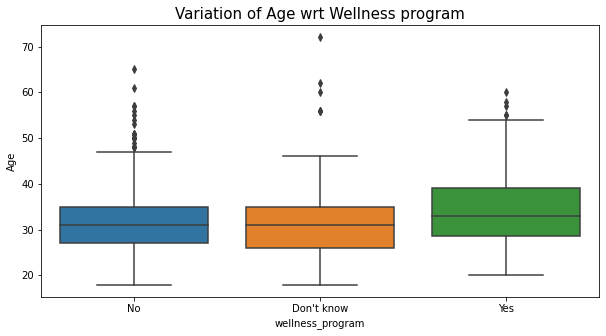

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.wellness_program,y=df.Age)
plt.title('Variation of Age wrt Wellness program',fontsize=15)
plt.show()

On an average the age of employees whose employer  discussed mental health as part of an employee wellness program is higher.<br>
The centre of distribution of age of employyes whose employer  discussed mental health is the highest of the three distributions (median is 32).The distribution  is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.<br>
There are employees above age 48 whose employes did not discuss with them about mental health as part of wellnes sprogram

### Age Vs Seek help

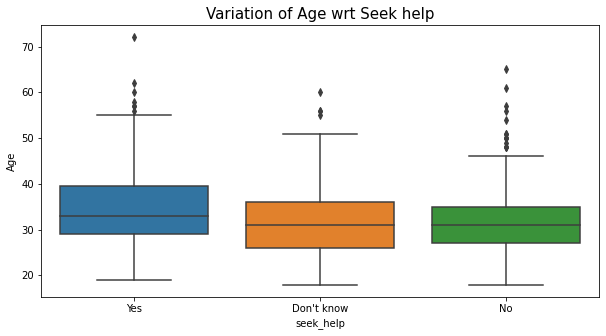

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.seek_help,y=df.Age)
plt.title('Variation of Age wrt Seek help',fontsize=15)
plt.show()

Average age of employees whose employer provide resources to learn more about mental health issues are higher .
<br>Few employees above age 50 dont know about the resources that employer provide to learn about health issue and how to seek help.
<br>Majority of employees of age above 48 are those whose employer does not  provide resources to learn more about mental health issues are higher .

### Age Vs Anonymity

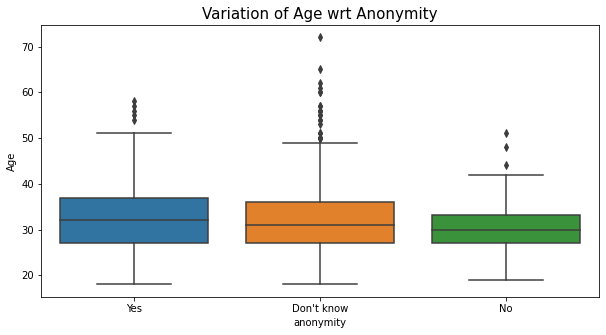

In [81]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.anonymity,y=df.Age)
plt.title('Variation of Age wrt Anonymity',fontsize=15)
plt.show()

In [82]:
#majority of employee above age 48 dont know about anonymity


### Age Vs Leave

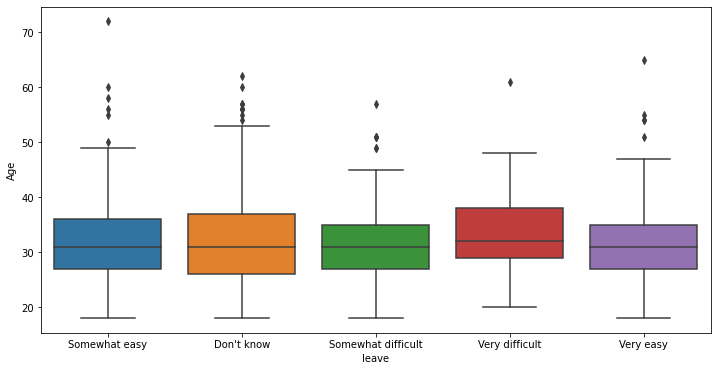

In [83]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df.leave,y=df.Age)
plt.show()

### Age Vs Mental_health_consequence

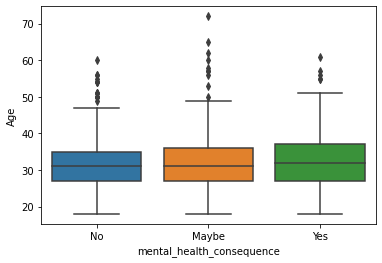

In [84]:
sns.boxplot(x=df.mental_health_consequence,y=df.Age)
plt.show()

Average age of employee who think think that discussing a mental health issue with your employer would have negative consequences is high.
Majority of employee above age 50 think that it might be possible to have negative consequences with employer if they discuss about mental health 

### Age Vs Physical_health_consequence

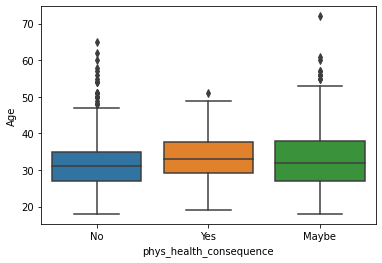

In [85]:
sns.boxplot(x=df.phys_health_consequence,y=df.Age)
plt.show()

Majority of employees about age 48 think think that discussing about physical health issue with your employer would not  have negative consequences is high

### Age Vs Coworkers

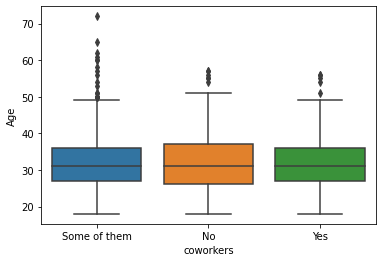

In [86]:
sns.boxplot(x=df.coworkers,y=df.Age)
plt.show()

Majotity of employees above age 50 will only be comforatable with some of the workers to discuss about mental health

### Age Vs Supervisor

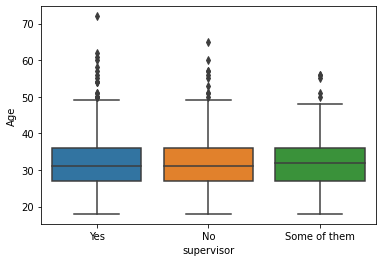

In [87]:
sns.boxplot(x=df.supervisor,y=df.Age)
plt.show()

Some of the employees's age who are willing to discuss a mental health issue with  direct supervisor has highest average age.
Majority of employees above age 50 are willing to discuss a mental health issue with  direct supervisor

### Age Vs Mental_health_interview

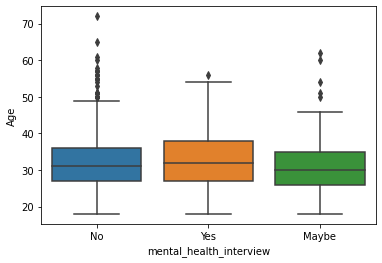

In [88]:
sns.boxplot(x=df.mental_health_interview,y=df.Age)
plt.show()

Employees above age 50 will not bring up a mental health issue with a potential employer in an interview.
Distribution employees age who are ready to bring up a mental health issue with a potential employer in an interviewis approximately symmetric, because both half-boxes are almost the same 


### Age Vs Physical_health_interview

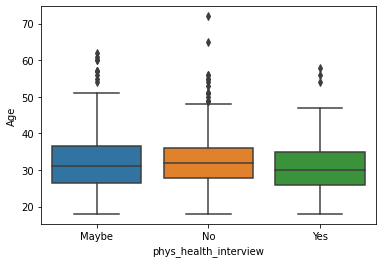

In [89]:
sns.boxplot(x=df.phys_health_interview,y=df.Age)
plt.show()

Average age of employees who are not willing to bring up a physical health issue with a potential employer in an interview is higher.
Age of employees who are not willing to bring up a physical health issue with a potential employer in an interview ranges above 60


### Age Vs Mental_health and Physical_health

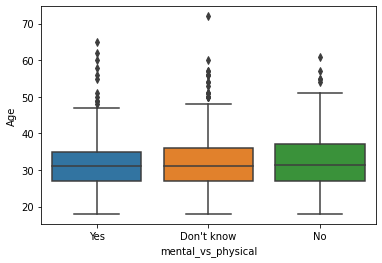

In [90]:
sns.boxplot(x=df.mental_vs_physical,y=df.Age)
plt.show()

Average of empoyer who does not takes mental health as seriously as physical health is higher .
Majority of employers above age 48 takes mental health as seriously as physical health

### Age Vs Obesity_consequence

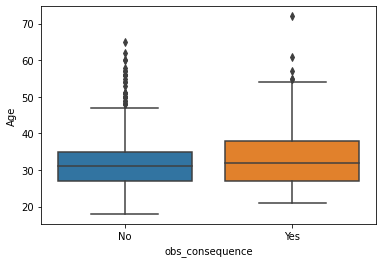

In [91]:
sns.boxplot(x=df.obs_consequence,y=df.Age)
plt.show()

Majority of employees above age 50 did not  observed negative consequences for coworkers with mental health conditions in your workplace

In [92]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [93]:
df.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,Male,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


### Gender Vs Self_employed

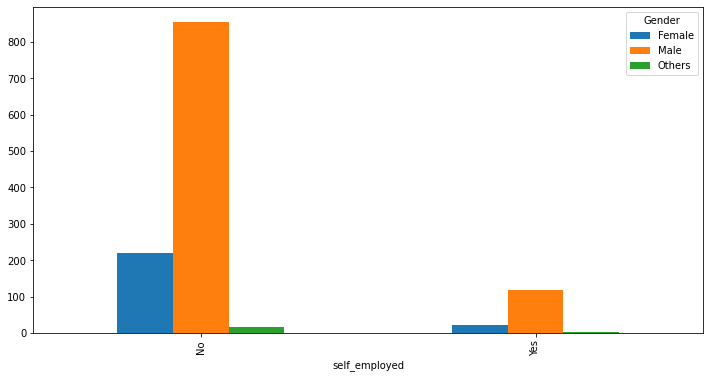

In [94]:
pd.crosstab(df['self_employed'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males and females are not self employed.

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1251 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1251 non-null   int64 
 1   Gender                     1251 non-null   object
 2   Country                    1251 non-null   object
 3   self_employed              1233 non-null   object
 4   family_history             1251 non-null   object
 5   treatment                  1251 non-null   object
 6   work_interfere             989 non-null    object
 7   no_employees               1251 non-null   object
 8   remote_work                1251 non-null   object
 9   tech_company               1251 non-null   object
 10  benefits                   1251 non-null   object
 11  care_options               1251 non-null   object
 12  wellness_program           1251 non-null   object
 13  seek_help                  1251 non-null   object
 14  anonymit

### Gender Vs Family_history

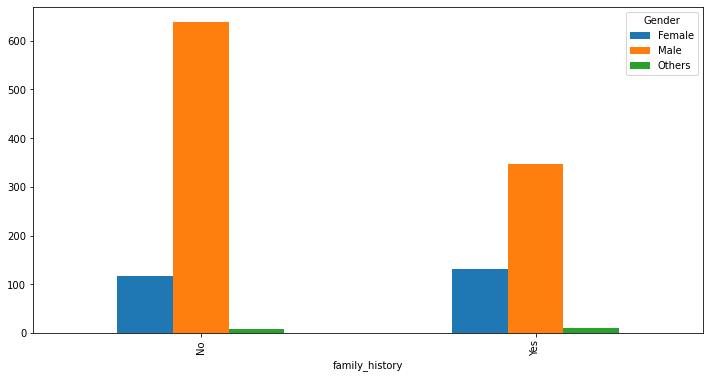

In [96]:
pd.crosstab(df['family_history'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males have no family history of mental health issues.
Slightly higher no. of females and other genders have family history of mental health issues.

### Gender Vs Treatment

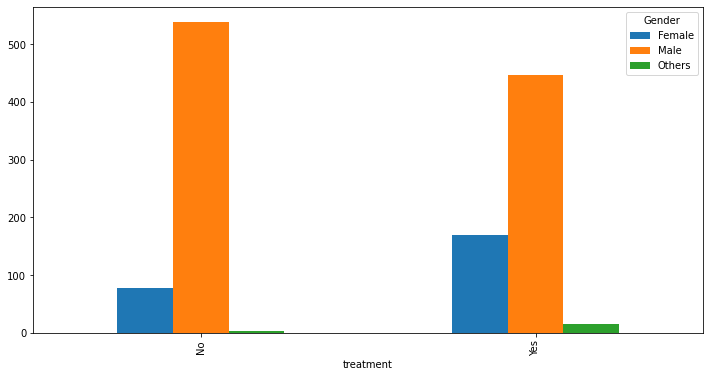

In [97]:
pd.crosstab(df['treatment'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher no. of males are not undergoing any treatment regarding their mental health.
Higher no of females and other  genders are undergoing any treatment regarding their mental health.

### Gender Vs Work_intrefere

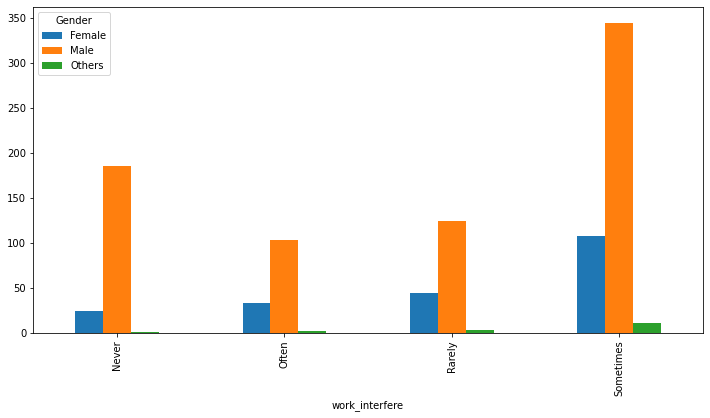

In [98]:
pd.crosstab(df['work_interfere'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

All the genders are facing some kind of work interference

### Gender Vs Remote_work

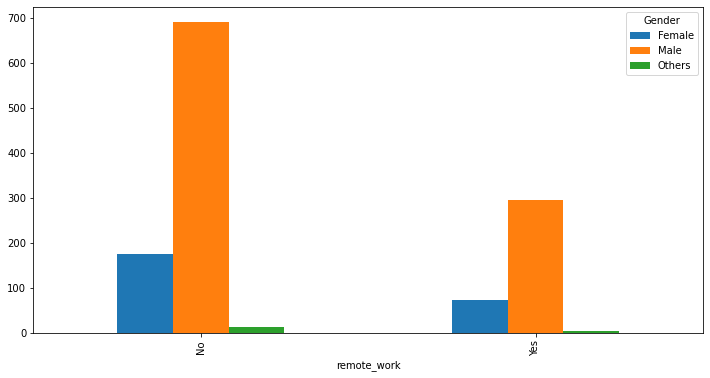

In [99]:
pd.crosstab(df['remote_work'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similar distribution can be seen in all genders. We may conclude that working remotely is independent of gender.

### Gender Vs Tech_company

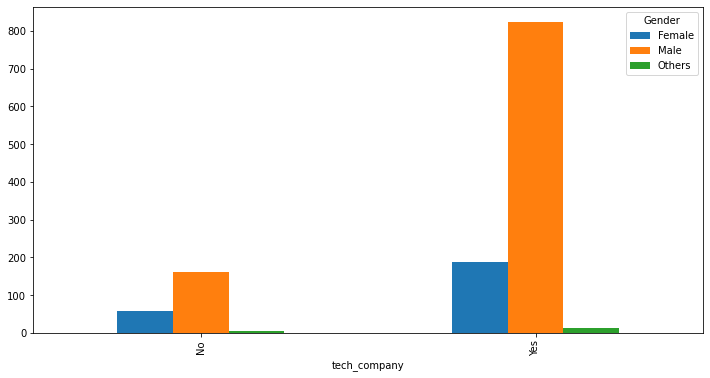

In [100]:
pd.crosstab(df['tech_company'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of the males are working in tech company/organization.
The proportion of females working in tech companies is less than males.

### Gender Vs Benefits

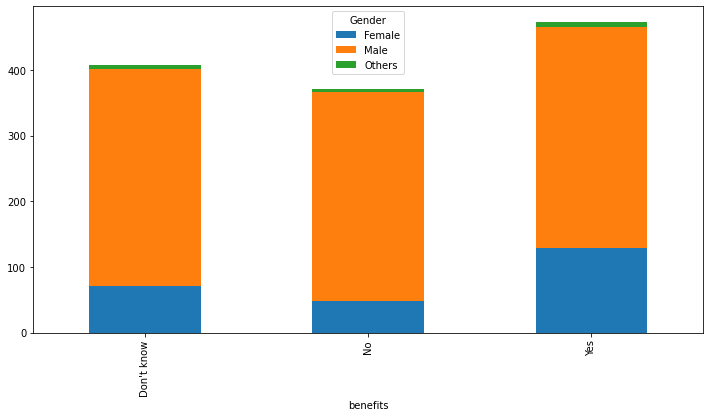

In [101]:
pd.crosstab(df['benefits'],df['Gender']).plot(kind='bar',stacked=True,figsize=(12,6))
plt.show()

Mental health benifits proportion is higher females.
<br>Ratio of males who are unaware of about the mental health benifits provided by the employer is higher.
<br>Mental health benifits provided by the employer may be gender depended.

### Gender Vs Care_options

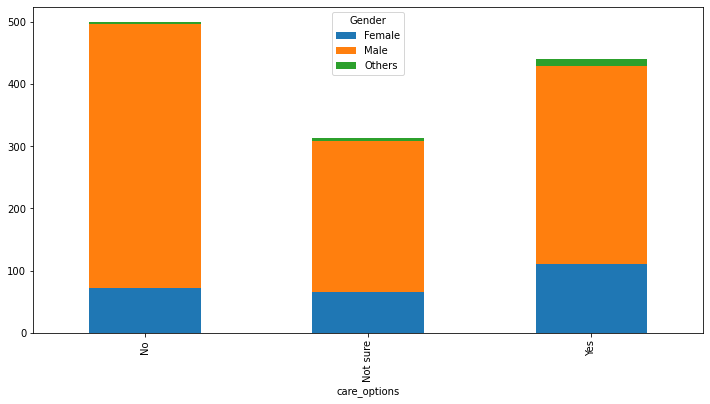

In [102]:
pd.crosstab(df['care_options'],df['Gender']).plot(kind='bar',figsize=(12,6),stacked=True)
plt.show()

Majority of the males don't know about the health care_options provided by employeer.
Comparatively higher proportion of females known about health care_options.

### Gender Vs Wellness_program

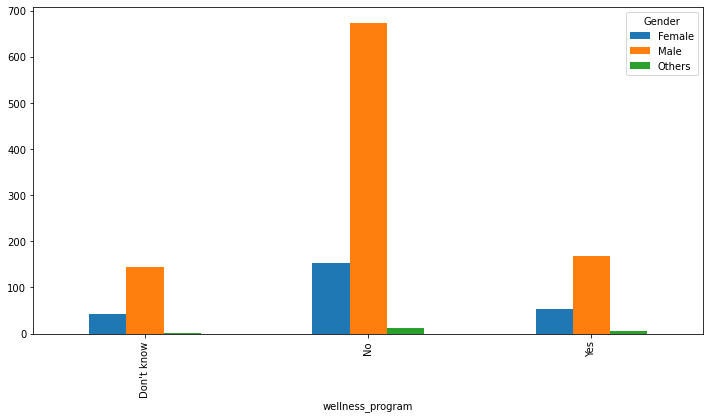

In [103]:
pd.crosstab(df['wellness_program'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similary distribution can be seen in all genders wrt wellness program. Hence we may conclude that employer discussion
<br>on mental health as part of an employee wellness program is independent of gender.

### Gender Vs Seek_help

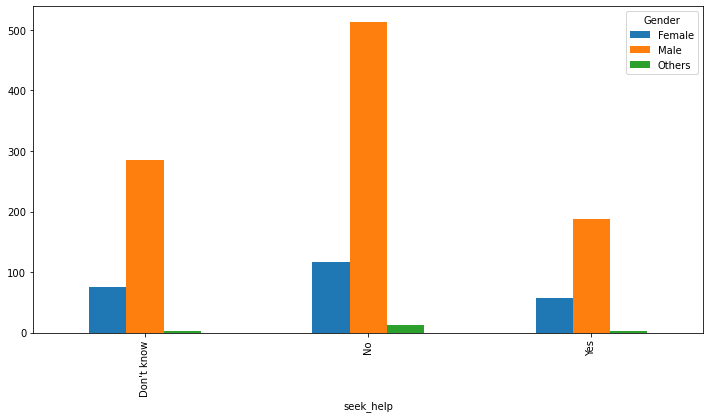

In [104]:
pd.crosstab(df['seek_help'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similary distribution can be seen in all genders wrt seek help. Hence we may conclude that employer providing resources to learn more about mental health issues and how to seek help is independent of gender.

### Gender Vs Anonymity

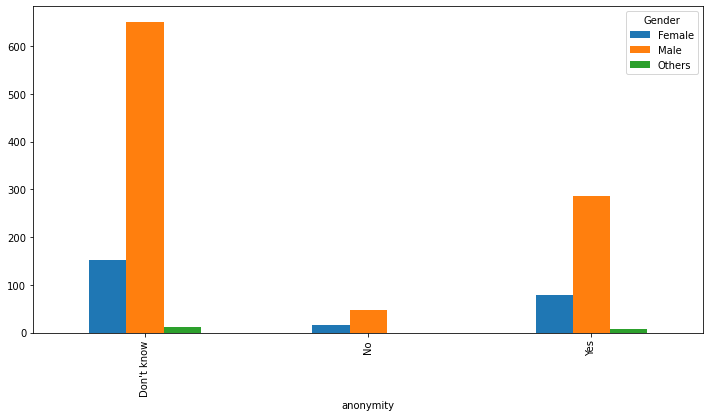

In [105]:
pd.crosstab(df['anonymity'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Similary distribution can be seen in all genders wrt anonymity. Hence we may conclude that anonymity protection
<br>if you choose to take advantage of mental health or substance abuse treat is independent of gender.

### Gender Vs Leave

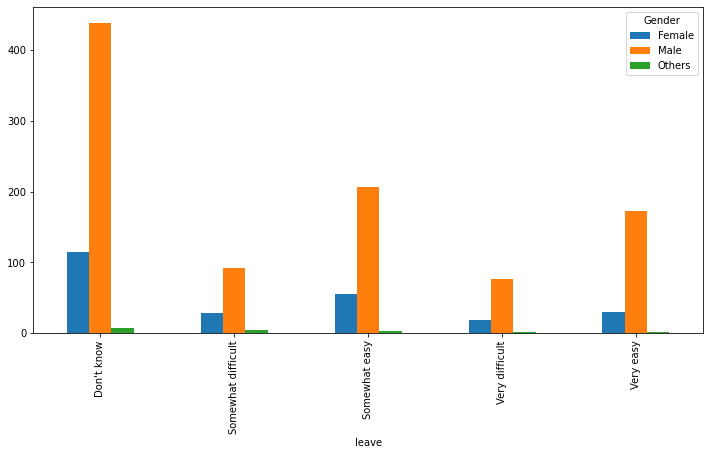

In [106]:
pd.crosstab(df['leave'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

There is no much difference in distribution of gender wrt to leave.
We may say the easy of take medical leave for a mental health condition is independent of gender

### Gender Vs Mental_health_consequence

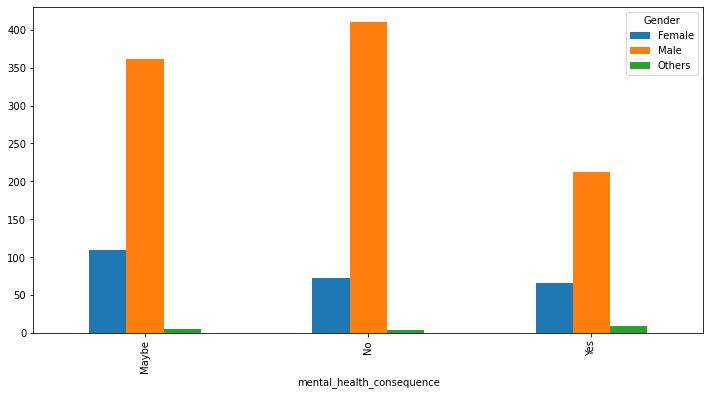

In [107]:
pd.crosstab(df['mental_health_consequence'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher no. of males think that discussing a mental health issue with your employer would not have negative consequences
<br>Higher no. of females think that discussing a mental health issue with your employer might have negative consequences

### Gender Vs Physical_health_consequence

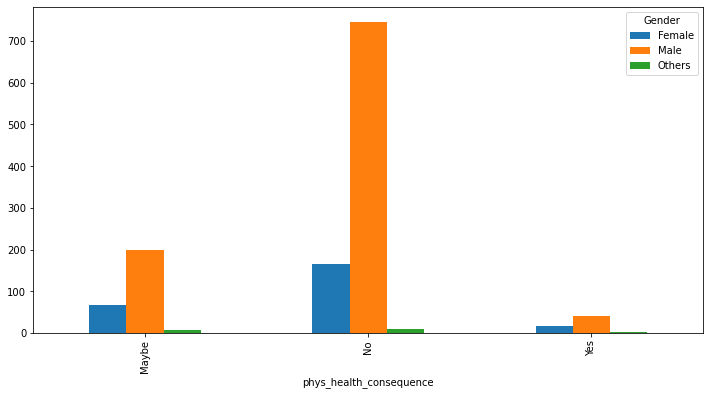

In [108]:
pd.crosstab(df['phys_health_consequence'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

In all genders, majority of the employees think that discussing a physical health issue with your employer would not have negative consequences

### Gender Vs Coworkers

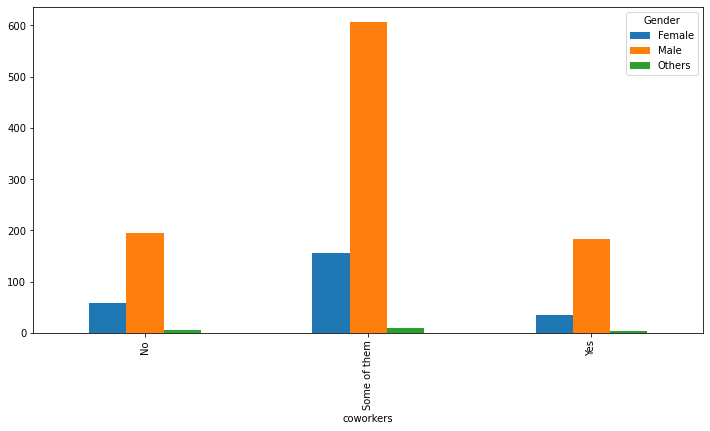

In [109]:
pd.crosstab(df['coworkers'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

All the gender employeers are mostly willing to discuss a mental health issue only with some of the coworkers.

### Gender Vs Supervisor

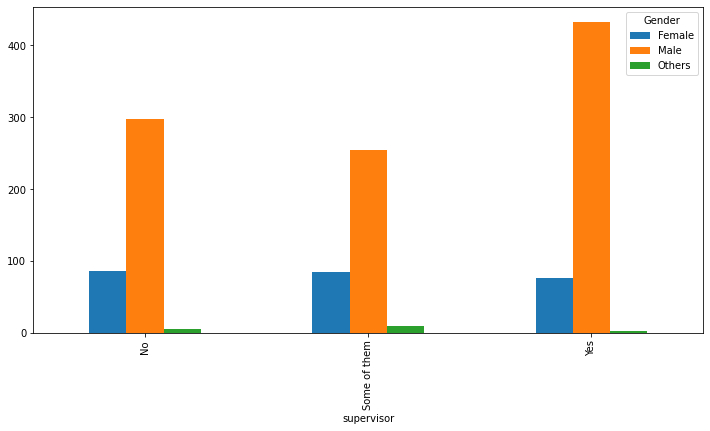

In [110]:
pd.crosstab(df['supervisor'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males are willing to discuss a mental health issue with direct supervisor(s)
<br>Proportion of females willing to discuss a mental health issue with direct supervisor(s) is less
<br>There may be gender dependency on willingness to discuss a mental health issue with direct supervisor(s)

### Gender Vs Mental_health_interview

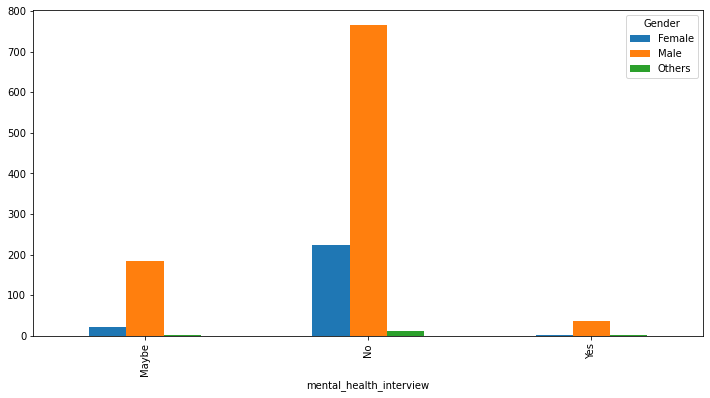

In [111]:
pd.crosstab(df['mental_health_interview'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Major no. of employees of all genders are not willing to bring up a mental health issue with a potential employer in an interview
<br>Specifically, the proportion of females are not willing to bring up a mental health issue with a potential employer
<br>in an interview,compared to other genders
<br>We may say that willingness to bring up a mental health issue with a potential employer in an interview is genders dependent.

### Gender Vs Physical_health_interview

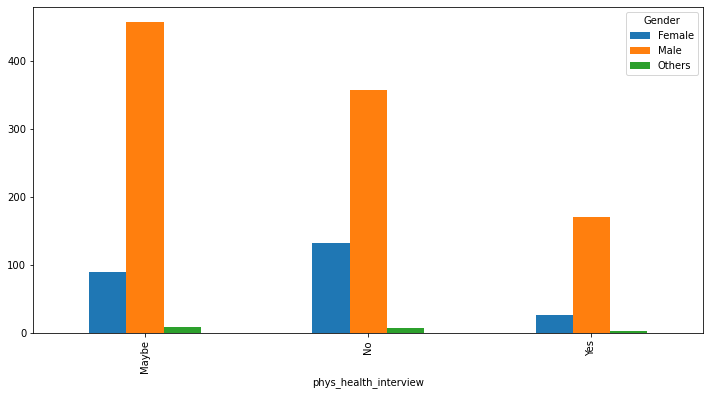

In [112]:
pd.crosstab(df['phys_health_interview'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of males are open to discuss physical health issue with a potential employer in an interview
<br>Maximum no. of females are not willing to discuss physical health issue with a potential employer in an interview
<br>Minimum no. of employees of all genders are willing to discuss physical health issue with a potential employer in an interview.
<br>we may say that the willingness to discuss physical health issue with a potential employer in an interview id dependent on gender

### Gender Vs Mental_vs_Physical

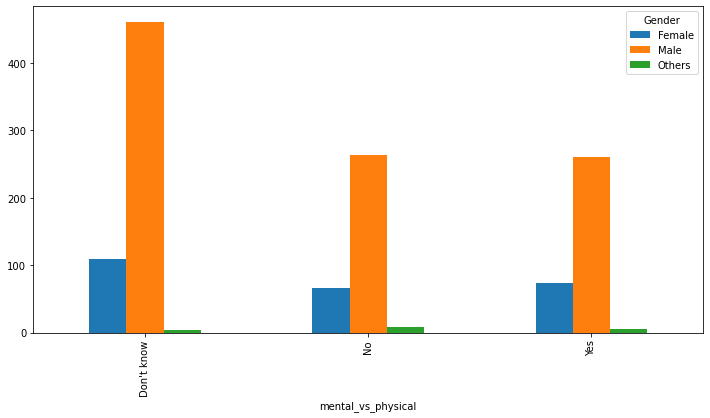

In [113]:
pd.crosstab(df['mental_vs_physical'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Maximum no. of males and females have don't know if their employer takes mental health as seriously as physical health.
<br> Amoung the employees who have an opinion, a slightly higher no.females feel that their employer takes mental health 
as seriously as physical health
<br>Amoung the employees who have an opinion,50% males feel that their employer takes mental health as seriously as 
physical health and remaining 50% males feels the opposite.

### Gender Vs Obeserved_consequence

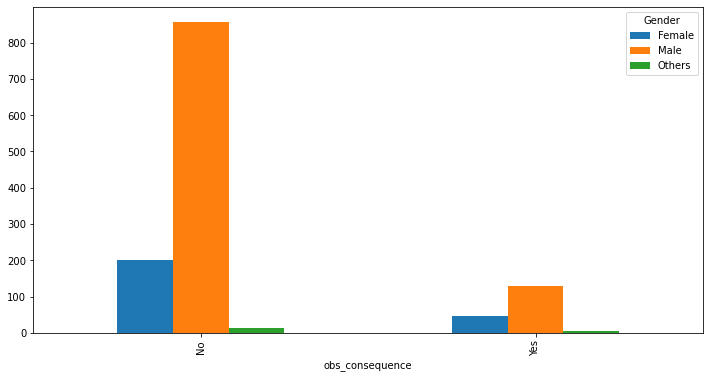

In [114]:
pd.crosstab(df['obs_consequence'],df['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees of all genders haven't heard of or observed negative consequences for coworkers with 
mental health conditions

### family_history vs treatment

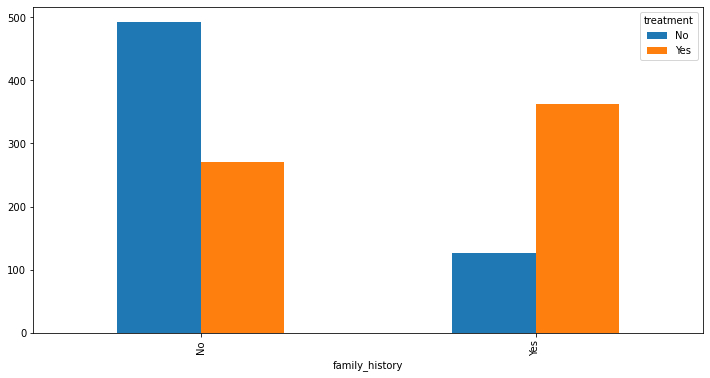

In [115]:
pd.crosstab(df["family_history"],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees with  no family history are less likely to get treament when compared to the employees with family history
<br> Majority of employees with significant margin don't have family history of health issues

### family_history vs work_interfere

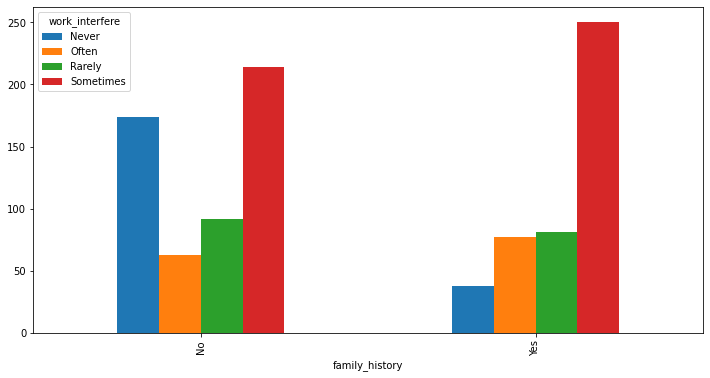

In [116]:
pd.crosstab(df["family_history"],df['work_interfere']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees with family history have their work interfered oftentimes or some times more than employees with out family history
<br>Employees without family history are more likely to don't have their work interfered ever 

### family_history vs mental_health_consequence

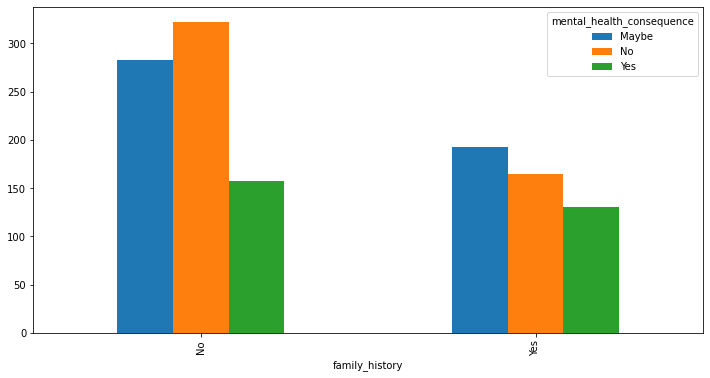

In [117]:
pd.crosstab(df["family_history"],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

A higher proportion of employees with no family history that discussing a mental health issue with your employer 
would not have negative consequences.
<br>Unlike employees with family history, a higher proportion think that discussing a mental health issue with your employer 
might have negative consequences

### family_history vs phys_health_consequence

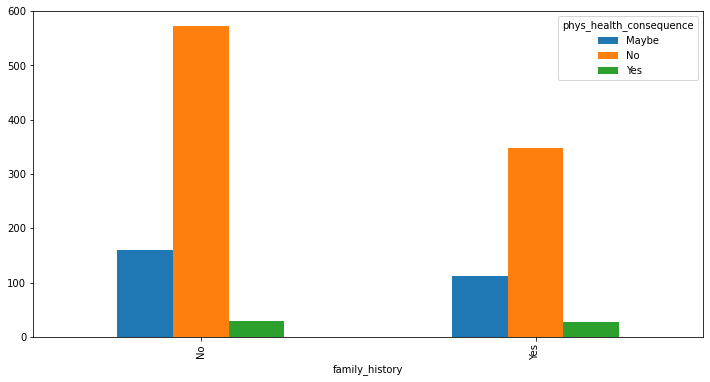

In [118]:
pd.crosstab(df["family_history"],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

discussing a physical health issue with your employer is not affect by family history 

### family_history vs coworkers

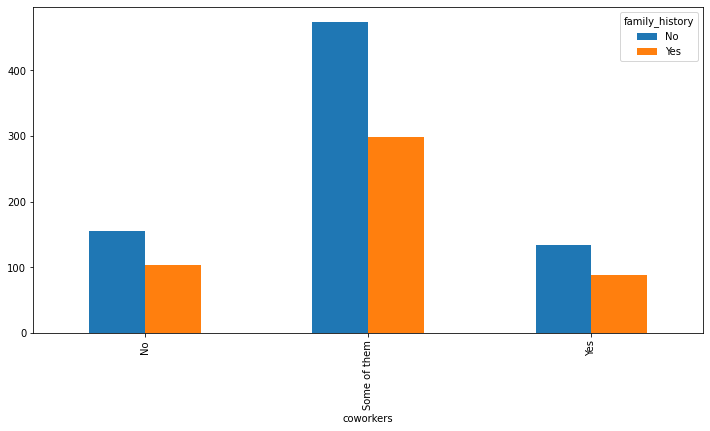

In [119]:
pd.crosstab(df['coworkers'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

willing to discuss a mental health issue with coworkers is independent of employees family history

### family_history vs supervisor

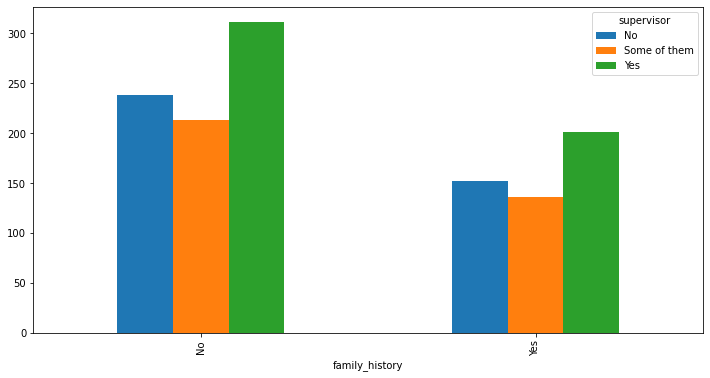

In [120]:
pd.crosstab(df["family_history"],df['supervisor']).plot(kind='bar',figsize=(12,6))
plt.show()

willingness to discuss a mental health issue with direct supervisor(s) is independent of family history of employee

### family_history vs mental_health_interview

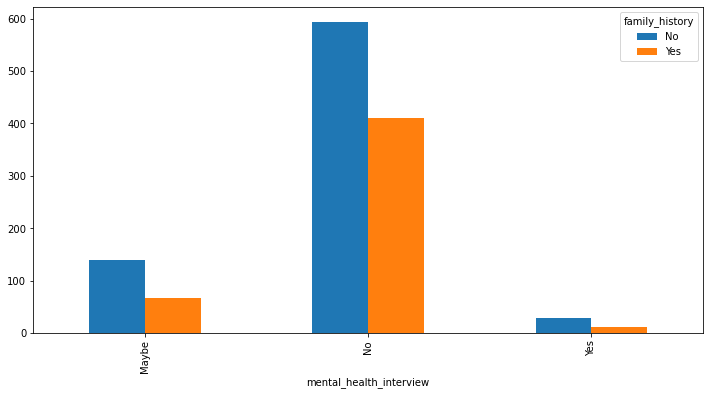

In [121]:
pd.crosstab(df['mental_health_interview'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

bringing up a mental health issue with a potential employer in an interview is independent of family history

### family_history vs phys_health_interview

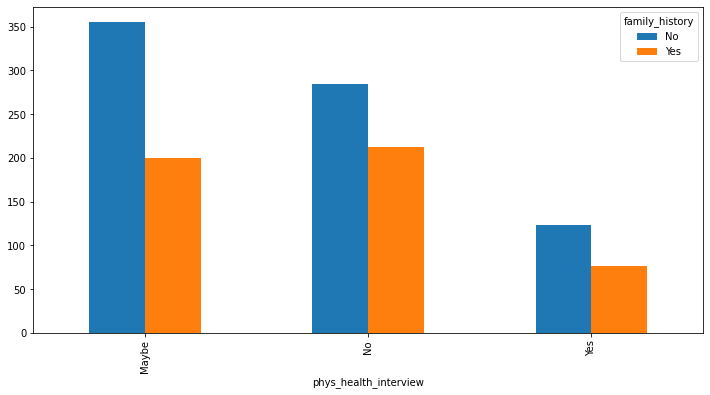

In [122]:
pd.crosstab(df['phys_health_interview'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

bringing up a physical health issue with a potential employer in an interview is independent of family history

### family_history vs mental_vs_physical

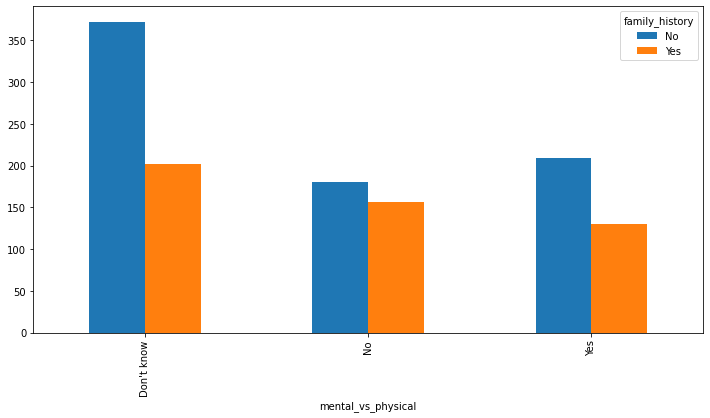

In [123]:
pd.crosstab(df['mental_vs_physical'],df["family_history"]).plot(kind='bar',figsize=(12,6))
plt.show()

minimum no. employees with family history feel that your employer takes mental health as seriously as physical health

### treatment vs work_interfere

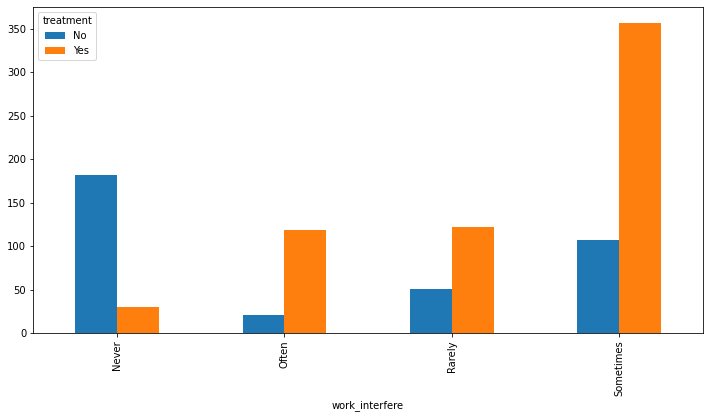

In [124]:
pd.crosstab(df['work_interfere'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who sought treatment for a mental health condition, find some kind of work interference because of mental health condition

### treatment vs remote_work

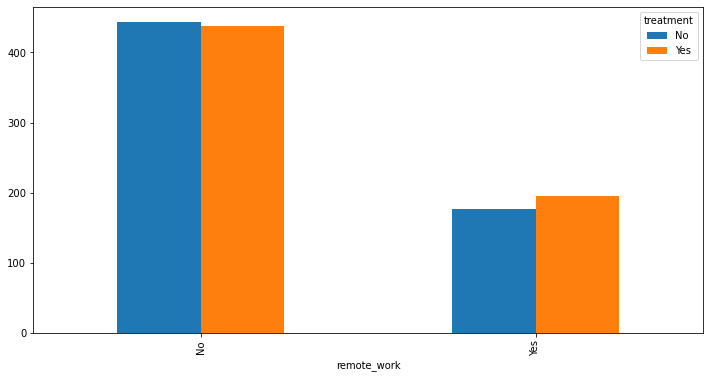

In [125]:
pd.crosstab(df['remote_work'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees are not working remotely.
<br>Amoung the employees working remotely, slightly higher no. of them have sought treatment for a mental health condition

### treatment vs mental_health_consequence

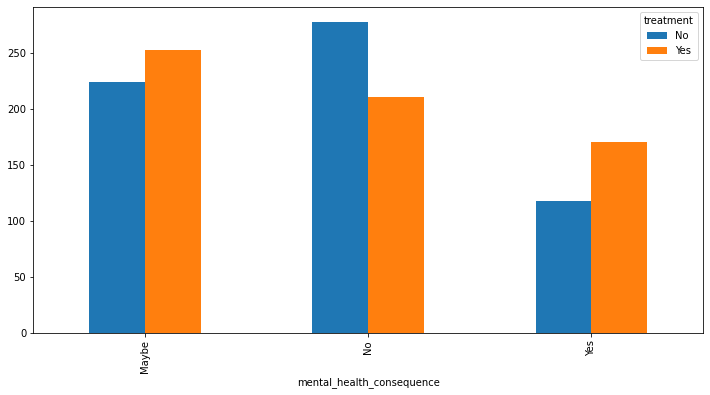

In [126]:
pd.crosstab(df['mental_health_consequence'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who sought treatment for mental health condition think that discussing a mental health issue with your employer 
would have negative consequences than employees who have not sought treatment

### treatment vs phys_health_consequence

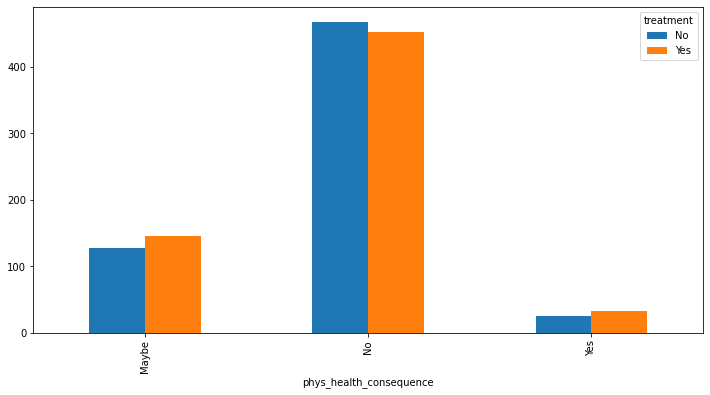

In [127]:
pd.crosstab(df['phys_health_consequence'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees who have not sought or sought treatment think that discussing a physical health issue with your 
employer wouldnot have negative consequences
<br>Amoung the employees who thing think that discussing a physical health issue with your employer would have negative
consequences, ratio  of employees who have sought treatment are higher

### treatment vs coworkers

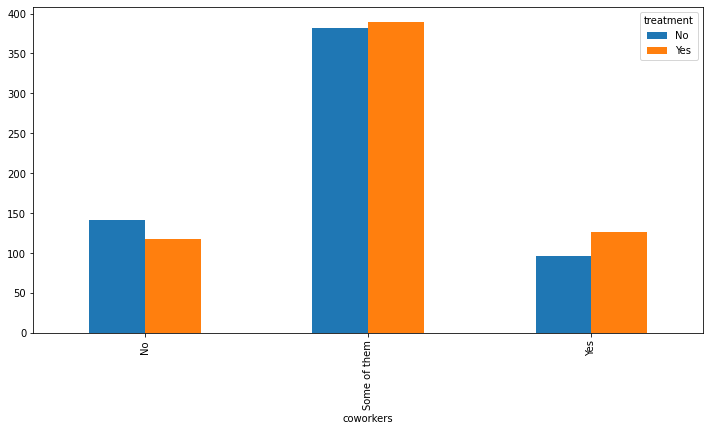

In [128]:
pd.crosstab(df['coworkers'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who have sought their treatment are willing to discuss a mental health issue with your coworkers as compared to who have not sought their treatment.
<br> both employees who have sought or not sought treatment are willing to discuss a mental health issue with your coworkers

### treatment vs leave

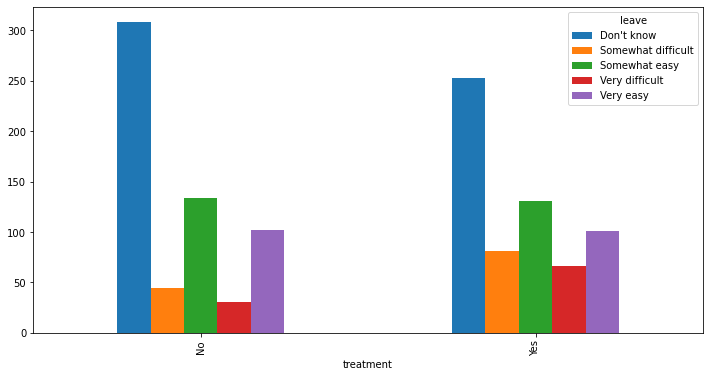

In [129]:
pd.crosstab(df['treatment'],df['leave']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees who have not sought treatment dont know about leaves provided for mental health condition
<br> More no. Employees who have sought their treatment found somewhat or very difficult to apply medical leave for mental health condition

### treatment vs mental_health_interview

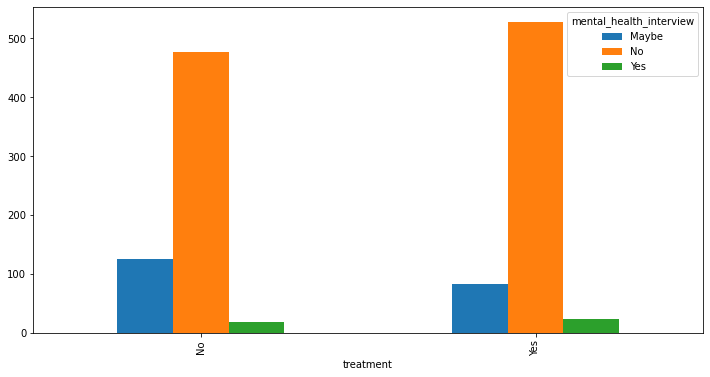

In [130]:
pd.crosstab(df['treatment'],df['mental_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employees who have sought their treatment are not willing to bring up a mental health issue with a potential employer in an interview
<br>Employees who have  not sought their treatment might not bring up a mental health issue with a potential employer in an interview

### treatment vs supervisor

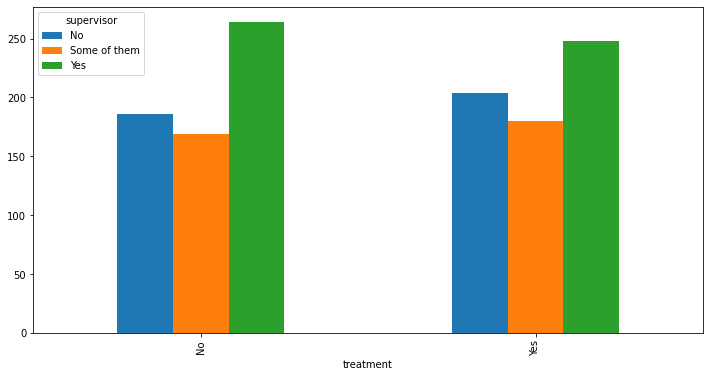

In [131]:
pd.crosstab(df['treatment'],df['supervisor']).plot(kind='bar',figsize=(12,6))
plt.show()

Majority of employyes who have not sought their treatment are willing to discuss a mental health issue with your direct supervisor
<br>Majority of employyes who have sought their treatment are not willing to discuss a mental health issue with your direct supervisor

### treatment vs phys_health_interview

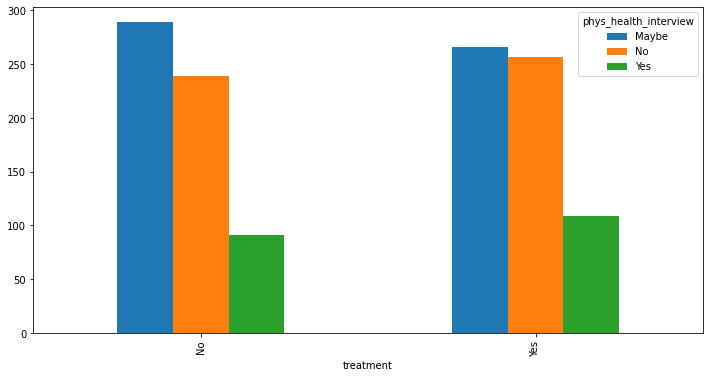

In [132]:
pd.crosstab(df['treatment'],df['phys_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who sought treatment for mental health conditions are not willing to discuss physical health issue with a
potential employer in an interview

### treatment vs mental_vs_physical

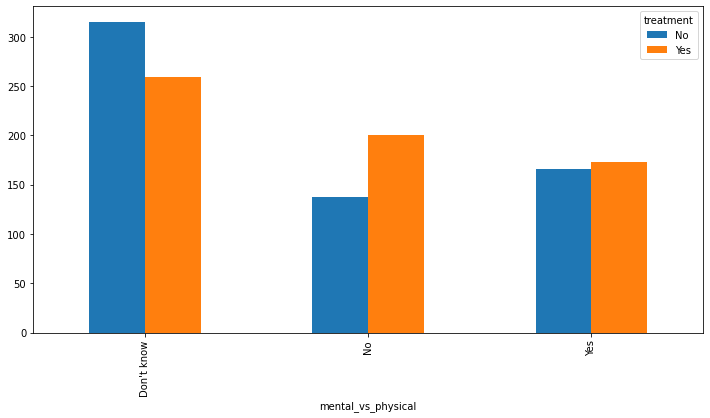

In [133]:
pd.crosstab(df['mental_vs_physical'],df['treatment']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher proportion of employees who have sought treatment think that their employer donot takes mental health as seriously as physical health

### remote_work vs benefits

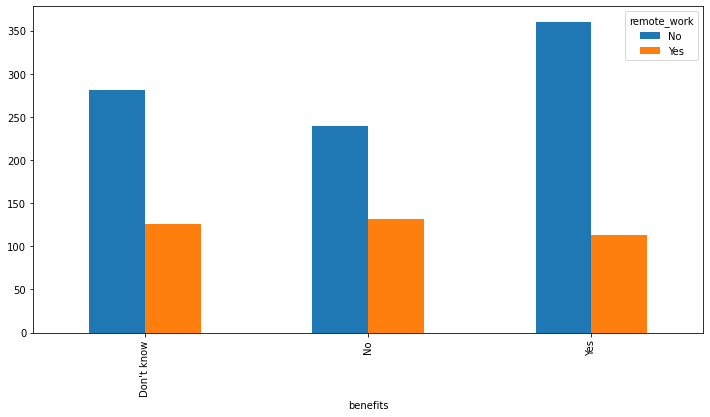

In [134]:
pd.crosstab(df['benefits'],df['remote_work']).plot(kind='bar',figsize=(12,6))
plt.show()

from above we say that the people who does not do remote work were high in number compare to people who does the remote work.
people who does not do remote work were more aware about the benifits.
<br>there is around 30% people who does the remote work knows about benifits.
<br>so we can say that people who does not do remote work were more aware about the benifits than others.

### remote_work vs mental_vs_physical

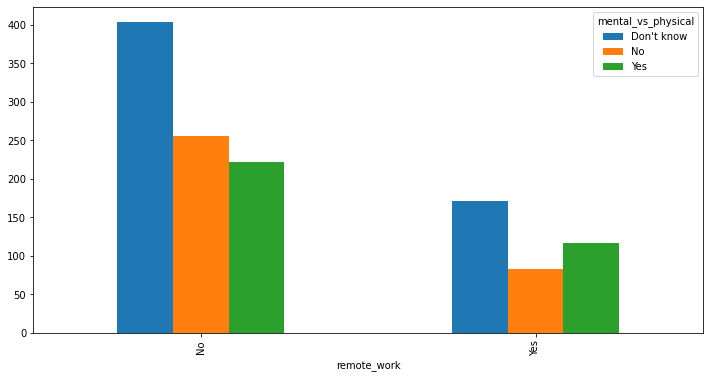

In [135]:
pd.crosstab(df['remote_work'],df['mental_vs_physical']).plot(kind='bar',figsize=(12,6))
plt.show()

For employees who work remotely, think that their employer takes mental health as seriously as physical health.
which is not the case for non-remote type of work.

### remote_work vs mental_health_consequence

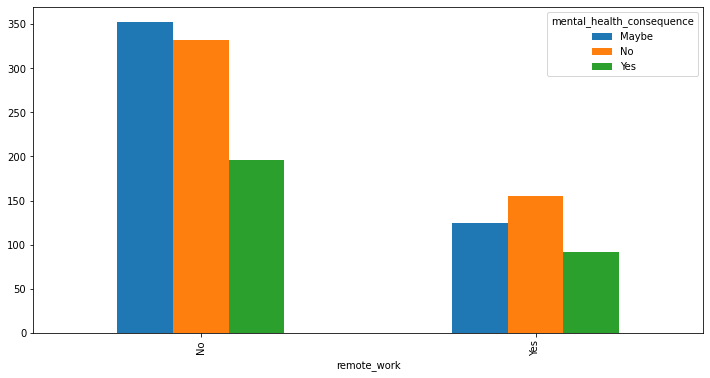

In [136]:
pd.crosstab(df['remote_work'],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees who work remotely, think that discussing a mental health issue with your employer would not have 
negative consequences unlike employees who work non-remote. 

### remote_work vs phys_health_consequence

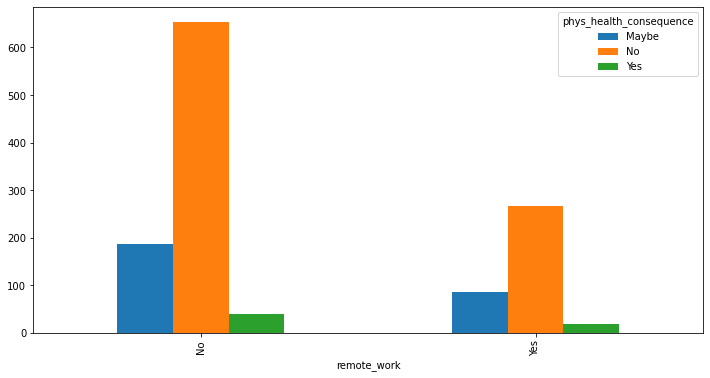

In [137]:
pd.crosstab(df['remote_work'],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Employees opinion on discussing a physical health issue with your employer having negative consequences is not affected by remote work.

### remote_work vs mental_health_interview


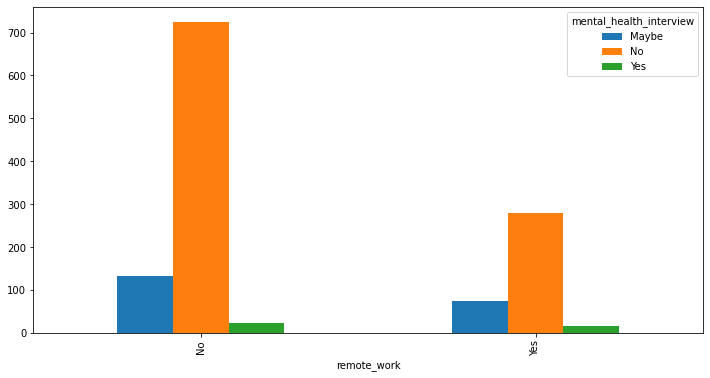

In [138]:
pd.crosstab(df['remote_work'],df['mental_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Openess to bring up a mental health issue with a potential employer in an interview is independent of work type(remote or not ).

### remote_work vs phys_health_interview

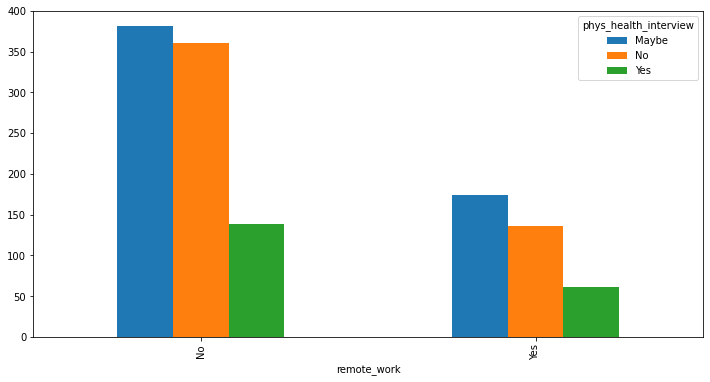

In [139]:
pd.crosstab(df['remote_work'],df['phys_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Openess to bring up a physical health issue with a potential employer in an interview is independent of work type(remote or not ).

In [140]:
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

### Self employed vs remote work

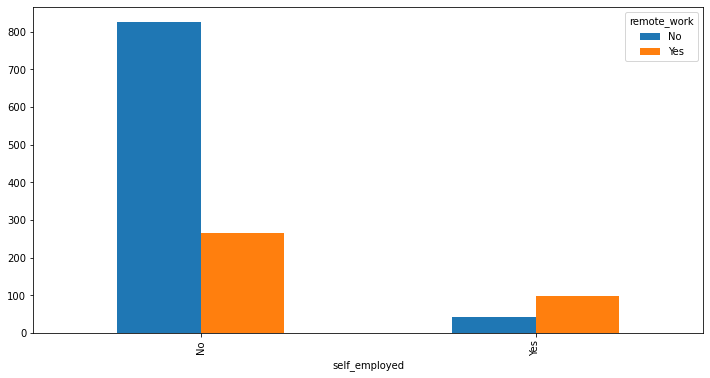

In [141]:
pd.crosstab(df['self_employed'],df['remote_work']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher ratio of people who are self employeed are working remotely
<br>from above we can say that people who are not self employed are not working remotely.

### Self employeed vs mental health consequences

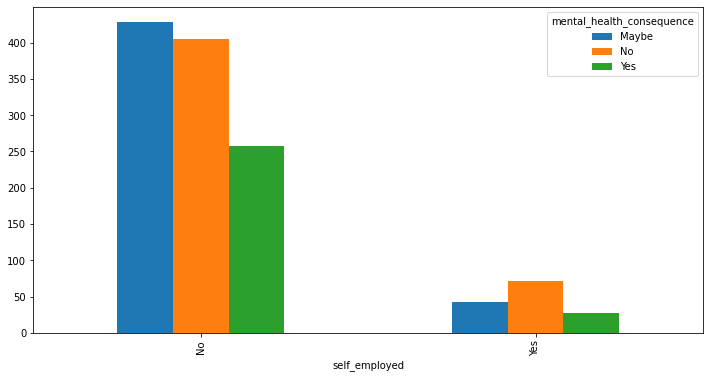

In [142]:
pd.crosstab(df['self_employed'],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher proportion of people who are self employed,think that discussing a mental health issue with your employer wouldnot
have negative consequences

### Self employeed vs physical health consequences

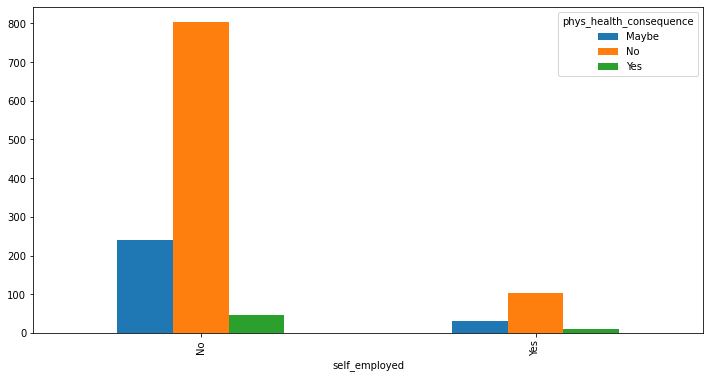

In [143]:
pd.crosstab(df['self_employed'],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Discussing a physical health issue with your employer is independent of employement type(Self or not)

### Self employeed vs physical health interview

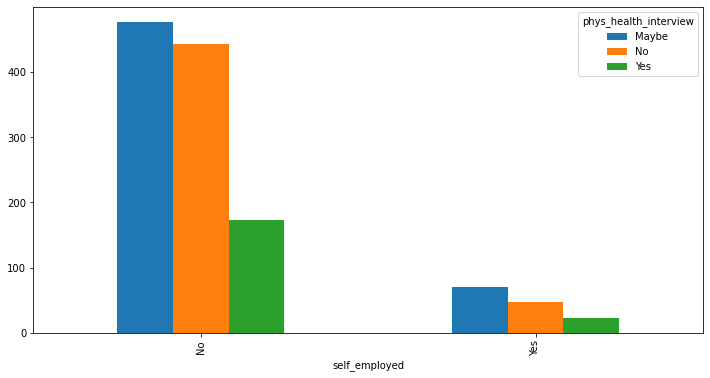

In [144]:
pd.crosstab(df['self_employed'],df['phys_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

openess bring up a mental health issue with a potential employer in an interview is independent of employement type(Self or not)

### Self employeed vs mental health interview

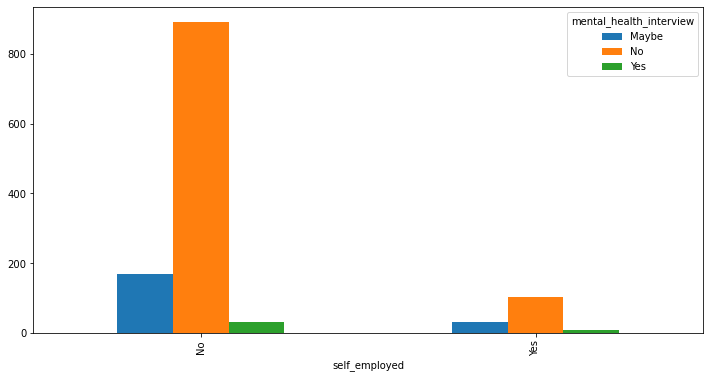

In [145]:
pd.crosstab(df['self_employed'],df['mental_health_interview']).plot(kind='bar',figsize=(12,6))
plt.show()

Maximum no. of people are not willing to u bring up a physical health issue with a potential employer in an interview 
irrespective of employement type(self or not)

### Self employeed vs Mental vs Physical

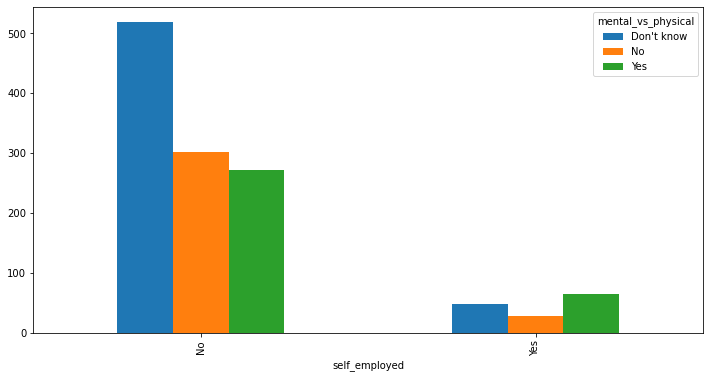

In [146]:
pd.crosstab(df['self_employed'],df['mental_vs_physical']).plot(kind='bar',figsize=(12,6))
plt.show()

A higher proportion of people who are self employeed feel that your employer takes mental health as seriously as physical health.
Which is not the case for people who are not self employeed.

### co workers vs mental health consequences

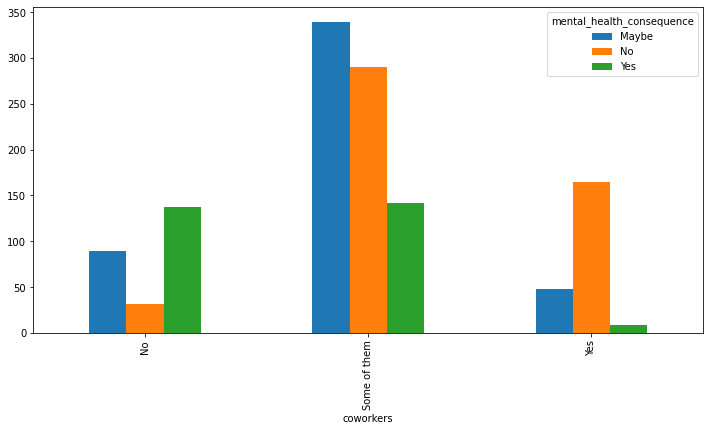

In [147]:
pd.crosstab(df['coworkers'],df['mental_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Maximum no. of employees willing to discuss a mental health issue with coworkers are not willing bring up a 
mental health issue with a potential employer in an interview

### Coworkers vs Physical health consequences

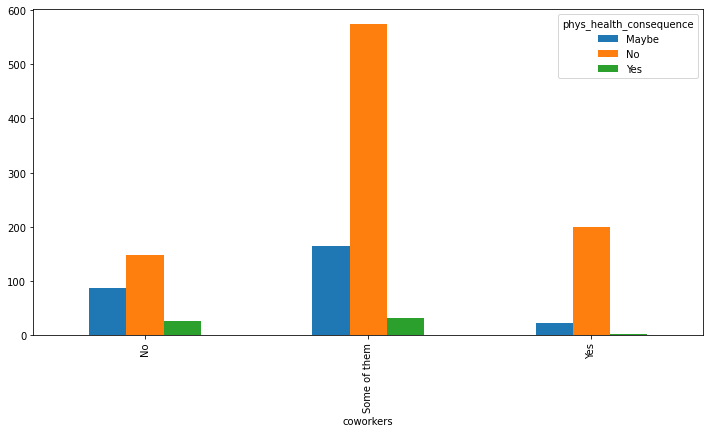

In [148]:
pd.crosstab(df['coworkers'],df['phys_health_consequence']).plot(kind='bar',figsize=(12,6))
plt.show()

Irrespective of willingness to discuss a mental health issue with coworkers, employees opinion on discussing a 
physical health issue with employer is the same.

### Coworkers vs Phy_health_interview

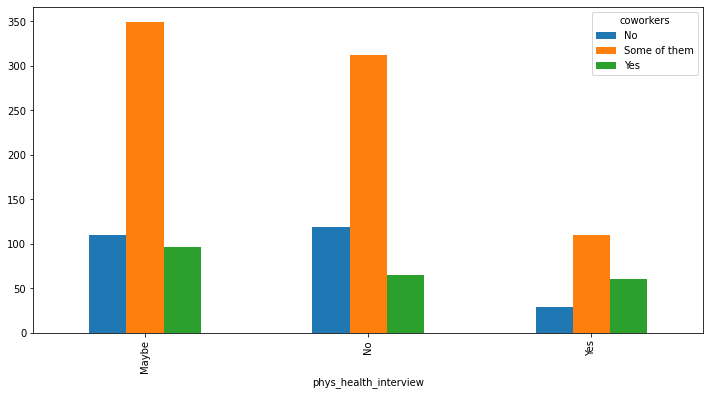

In [149]:
pd.crosstab(df['phys_health_interview'],df['coworkers']).plot(kind='bar',figsize=(12,6))
plt.show()

The ratio of employees willinging to discuss a mental health issue with coworkers and employees willinging to bring up a 
physical health issue with a potential employer in an interview is slightly higher.

### Coworker vs mental health interview

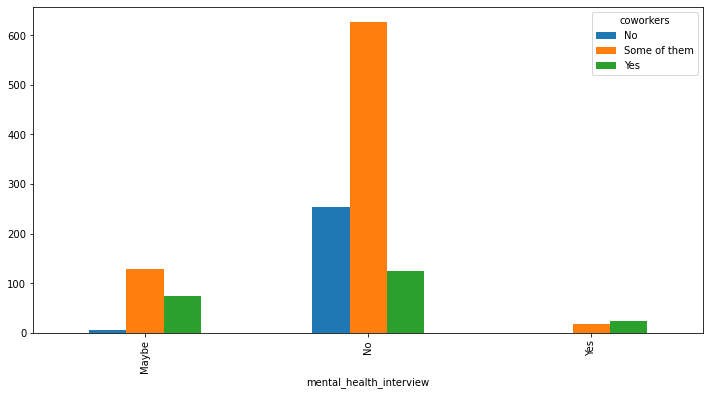

In [150]:
pd.crosstab(df['mental_health_interview'],df['coworkers']).plot(kind='bar',figsize=(12,6))
plt.show()

Higher ratio of employees who willinging to discuss a mental health issue with coworkers are also willinging to bring up  
physical health issue with a potential employer in an interview.

## Multi Variant Analysis

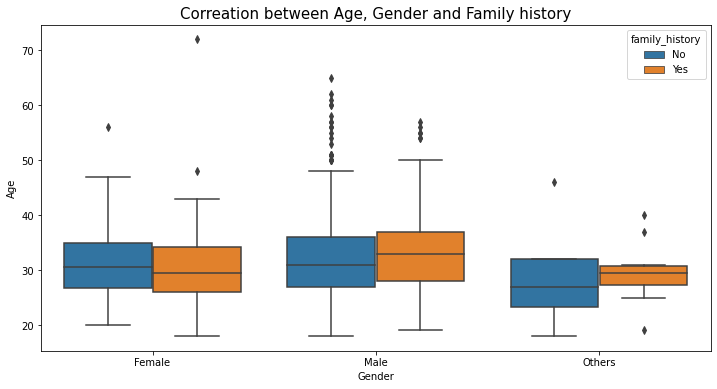

In [151]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df['Gender'],y=df['Age'],hue=df['family_history'])
plt.title('Correation between Age, Gender and Family history',fontsize=15)
plt.show()

The average age of females who have family history is less than the average age of females who have family history.
The average age of males and other gender who have family history is greater than the average age of females who have family history.

### Does gender and family history have effect on treatment ?

In [152]:
pd.pivot_table(df,index =['treatment'],columns=['Gender','family_history'],values=['Age'], aggfunc='count',margins=True)

Age                                
Gender         Female      Male      Others       All
family_history     No  Yes   No  Yes     No Yes      
treatment                                            
No                 52   26  438  100      2   1   619
Yes                64  106  200  247      6   9   632
All               116  132  638  347      8  10  1251

Higher number of females with family history are undergoing treatement for mrntal health condition.Highest number of males with no family history are not undergoing treatment.
Looks like gender and family history may have effect on treatment.

In [153]:
pd.pivot_table(df,index =['treatment'],columns=['Gender','work_interfere'],values=['Age'], aggfunc='count',margins=True)

Age                                                        \
Gender         Female                          Male                           
work_interfere  Never Often Rarely Sometimes  Never  Often Rarely Sometimes   
treatment                                                                     
No               18.0   2.0    6.0      17.0  163.0   19.0   45.0      89.0   
Yes               7.0  32.0   39.0      91.0   23.0   85.0   80.0     256.0   
All              25.0  34.0   45.0     108.0  186.0  104.0  125.0     345.0   

                                                   
Gender         Others                         All  
work_interfere  Never Often Rarely Sometimes       
treatment                                          
No                1.0   NaN    NaN       1.0  361  
Yes               NaN   2.0    3.0      10.0  628  
All               1.0   2.0    3.0      11.0  989

A very small count of employees of all genders who are undergoing treatment, feel that their mental health condition never interferes with work.
Most of the employees of all genders who are undergoing treatment, have experienced some sort of work interference. 

### OUTLIERS TREATMENT 

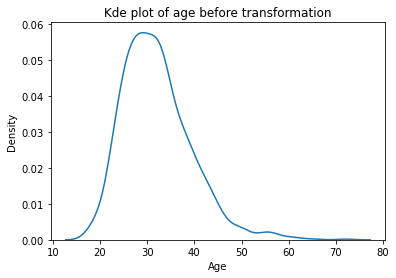

In [154]:
sns.kdeplot(x=df['Age'])
plt.title('Kde plot of age before transformation')
plt.show()

There are outliers present in the variable age. Reducing the skewness by using boxcox transformation.

In [155]:
# Q1 = df['Age'].quantile(0.25)
# Q3 = df['Age'].quantile(0.75)

# IQR = Q3-Q1
# UL = Q3+1.5*IQR
# LL = Q1-1.5*IQR

# age_out = df[(df['Age']<LL)|(df['Age']>UL)].index
# df.drop(index=age_out,axis=0,inplace=True)

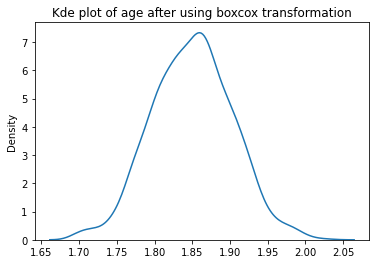

In [156]:
box_age = stats.boxcox(df['Age'])
sns.kdeplot(box_age[0])
plt.title('Kde plot of age after using boxcox transformation')
plt.show()

In [157]:
print('The skewness of age after transformation',stats.skew(box_age[0]))

The skewness of age after transformation 0.0005640364985209749


The age curve looks almost normal after boxcox transformation and the skewness of the age has been reduced to 0.0005 which is almost normal distribution 

In [158]:
df['Age'] = box_age[0]

# Missing Value

In [159]:
null_df = pd.DataFrame()
null_df['Count'] = df.isnull().sum()
null_df['Percent'] = null_df['Count']/len(null_df)
null_df[null_df['Percent']!=0].sort_values('Percent',ascending=False)

,Count,Percent
work_interfere,262,10.916667
self_employed,18,0.750000


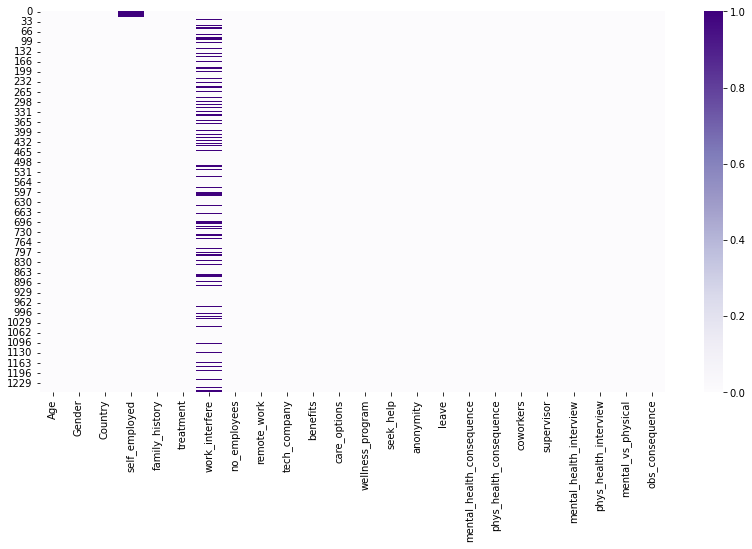

In [160]:
plt.figure(figsize=(14,7))
sns.heatmap(df.isnull(),cmap='Purples')
plt.show()

### Imputing missing values with mode 

In [161]:
df.self_employed.value_counts()

No     1091
Yes     142
Name: self_employed, dtype: int64

In [162]:
wi_freq_value = df.work_interfere.mode() 
df['work_interfere'].fillna(wi_freq_value[0],inplace=True)

In [163]:
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace=True)

In [164]:
df.isnull().sum().sum()

0

In [165]:
# No missing values

### Statistical test to see if Mental health issues is related to country

In [166]:
# Considering only US, UK and Canada countries to analysis the effect of country on mental health

In [167]:
df_country = df[(df['Country']=='United States') |( df['Country']=='United Kingdom')|( df['Country']=='Canada')]

In [168]:
df_country.shape

(1002, 24)

In [169]:
from scipy.stats import chi2_contingency

Hypothesis<br>
H0: Mental health treatment is indepedent on country<br>
H1: Mental health traetment is dependent on country

In [170]:
country_MH_table = pd.crosstab(df_country['Country'],df_country['treatment'])
country_MH_table

treatment,No,Yes
Country,,
Canada,35,37
United Kingdom,92,92
United States,338,408


In [171]:
obs_val = country_MH_table.values
alpha = 0.01
test_stat,p,dof,exp_val = chi2_contingency(obs_val)
print('p-value :',p)
print('Test Statistics :',test_stat)

p-value : 0.48244069852842053
Test Statistics : 1.457794540721592


Here p-value is greater than 0.01. Hence we fail to reject null hypothesis and we can counclude that<br>
Mental health issue treatment is independed on country.<br>
(Note: Considering only US, UK and Canada)

But here we are droping country column as the no. of entries in the each country is not sufficient and it effects the model(most of the countries have only 1 entry).  This affects the model significantly. 

In [172]:
df.drop('Country',axis=1,inplace=True)

### Statistical test to see if Mental health issues is related to gender

Hypothesis<br>
H0: Mental health issue is indepedent on gender<br>
H1: Mental health issue is dependent on gender

In [173]:
gender_MH_table = pd.crosstab(df['Gender'],df['treatment'])
gender_MH_table

treatment,No,Yes
Gender,,
Female,78,170
Male,538,447
Others,3,15


In [174]:
obs_val = gender_MH_table.values
alpha = 0.05
test_stat,p,dof,exp_val = chi2_contingency(obs_val)
print('p-value :',p)
print('Test Statistics :',test_stat)

p-value : 1.1333648268835793e-11
Test Statistics : 50.4064901838798


Here p-value is less than 0.05. Hence we reject null hypothesis and we can counclude that Mental health issue treatment is depended on gender.

### Statistical test to see if Mental health treatment has impact on work interference.

Hypothesis<br>
H0: Mental health treatment is indepedent on work interference<br>
H1: Mental health treatment is dependent on work interference

In [175]:
work_int_table = pd.crosstab(df['work_interfere'],df['treatment'])
work_int_table

treatment,No,Yes
work_interfere,,
Never,182,30
Often,21,119
Rarely,51,122
Sometimes,365,361


In [176]:
obs_val = work_int_table.values
alpha = 0.05
test_stat,p,dof,exp_val = chi2_contingency(obs_val)
print('p-value :',p)
print('Test Statistics :',test_stat)

p-value : 1.55840094394588e-44
Test Statistics : 206.6291203303157


Here p-value is less than 0.05. Hence we reject null hypothesis and we can counclude that Mental health treatment has impact on work interference.

### Statistical test to see if Age has impact on Mental health

In [177]:
# To test the normality of Age variable
stat, p_value = stats.shapiro(df['Age'])

print('p-value:', p_value)

p-value: 0.006379035301506519


Here p-value<0.05 (5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis is selected.<br>
The data is not normally distributed.

Since data points does not statisfy normality. Mannwhtineyu test is used whic is the equivalent test for unpaired t test.

In [178]:
MH_yes = df[df['treatment']=='Yes']
MH_no = df[df['treatment']=='No']

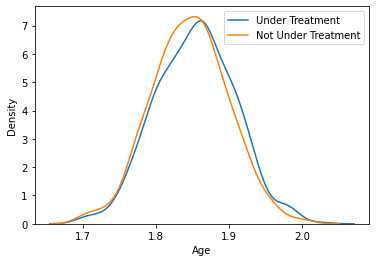

In [179]:
# Graphical understanding:

sns.kdeplot(MH_yes['Age'],label='Under Treatment')
sns.kdeplot(MH_no['Age'],label='Not Under Treatment')
plt.legend()
plt.show()

In [180]:
# Ho: μ_yes =  μ_no (No difference in age with respect to Mental health issue treatment)
# H1: μ_yes ≠  μ_no (Significant difference in potential with respect to Mental health issue treatment)


test = stats.mannwhitneyu(MH_yes['Age'],MH_no['Age'])
print('p_value:',test[1])

p_value: 0.014167540652394681


Since p_value < 0.05(5% Significance level). Null Hypothesis is rejected i.e Alternate Hypothesis is selected. 

We can inference that there is Significant difference in age with respect to Mental health issue treatment.



# Impact of mental health on coworkers at workplace

In [181]:
data=pd.crosstab(df['treatment'],df['obs_consequence'])

In [182]:

chi=chi2_contingency(data.values)
chi_stats=chi[0]
p_value=chi[1]

In [183]:
print('test_stats:',chi_stats)
print('pvalue:',p_value)
#here p_value <0.05 , null hypothesis is rejected i.e mental health issue has impact on co workers at work

test_stats: 28.242021978750884
pvalue: 1.0705496703984696e-07


here p_value <0.05 , null hypothesis is rejected i.e mental health issue has impact on co workers at work

# Is mental health has relation with the family History 

H0: Employees having mental health treatment has no family history of mental illness 

H1: Employees having mental health treatment hasfamily history of mental illness 

In [184]:
fam_history_table=pd.crosstab(df['treatment'],df['family_history'])
fam_history_table

family_history,No,Yes
treatment,,
No,492,127
Yes,270,362


In [185]:
test_stats,p_value,dof,expected_values=chi2_contingency(fam_history_table.values)
print('test_stats:',test_stats)
print('pvalue:',p_value)

test_stats: 175.95516961872426
pvalue: 3.703610823400622e-40


since p_value <0.05, Null hypothesis is rejected .

Thus, Employees having mental health treatment has family history of mental illness

## MODELLING

In [186]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1.892066,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1.930558,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,1.857658,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,1.849859,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,1.849859,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [187]:
print(df['work_interfere'].unique())
print(df['leave'].unique())
print(df['no_employees'].unique())

['Often' 'Rarely' 'Never' 'Sometimes']
['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']
['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']


In [188]:
df.head()

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,1.892066,Female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,1.930558,Male,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,1.857658,Male,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,1.849859,Male,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,1.849859,Male,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [189]:
data_cat = df.drop(['work_interfere','leave','treatment','no_employees'],axis=1)
data_ord =  df[['work_interfere','leave','no_employees']]

In [190]:
encoder = OrdinalEncoder(categories=[['Never','Rarely','Sometimes','Often']])                  
df['work_interfere'] = encoder.fit_transform(df['work_interfere'].values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[["Don't know",'Very difficult','Somewhat difficult','Somewhat easy','Very easy']])
df['leave'] = encoder.fit_transform(df['leave'].values.reshape(-1,1))

encoder = OrdinalEncoder(categories=[['1-5','6-25','26-100', '100-500', '500-1000','More than 1000']])
df['no_employees'] = encoder.fit_transform(df['no_employees'].values.reshape(-1,1))

data_cat_encoding = pd.get_dummies(data_cat,drop_first=True)

In [191]:
y = df['treatment']

X_final = pd.DataFrame()
X_final = pd.concat([data_cat_encoding,df['work_interfere'],df['leave'],df['no_employees']],axis=1)
X_final

,Age,Gender_Male,Gender_Others,self_employed_Yes,family_history_Yes,remote_work_Yes,tech_company_Yes,benefits_No,benefits_Yes,care_options_Not sure,care_options_Yes,wellness_program_No,wellness_program_Yes,seek_help_No,seek_help_Yes,anonymity_No,anonymity_Yes,mental_health_consequence_No,mental_health_consequence_Yes,phys_health_consequence_No,phys_health_consequence_Yes,coworkers_Some of them,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes,work_interfere,leave,no_employees
0,1.892066,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0,3.0,3.0,1.0
1,1.930558,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1.0,0.0,5.0
2,1.857658,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,1.0,2.0,1.0
3,1.849859,1,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,3.0,2.0,2.0
4,1.849859,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,1.804777,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,2.0,3.0,2.0
1255,1.857658,1,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,3.0,2.0,2.0
1256,1.872274,1,0,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,2.0,2.0,5.0
1257,1.940003,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,2.0,0.0,3.0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

In [193]:
import smlr
model = smlr.SMLR(max_iter=1000, tol=1e-8, verbose=5)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 444.022329


In [194]:
# import xgboost
# from xgboost import XGBClassifier

# xgb = XGBClassifier(learning_rate = 0.01, gamma=2)
# xgb.fit(X_train,y_train)

In [195]:


print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

          No       0.68      0.72      0.70       176
         Yes       0.74      0.70      0.72       200

    accuracy                           0.71       376
   macro avg       0.71      0.71      0.71       376
weighted avg       0.71      0.71      0.71       376



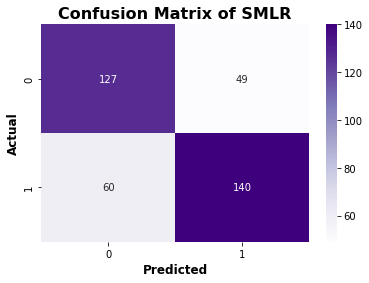

In [196]:
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix, annot=True,fmt='d', cmap='Purples')
plt.title('Confusion Matrix of SMLR', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show()

In [197]:
predictions_prob = model.predict_proba(X_test)
roc_auc_score(y_test,predictions_prob[:,1])

0.7701988636363636

In [198]:
tn=cf_matrix[0,0]
fp=cf_matrix[0,1]
fn=cf_matrix[1,0]
tp=cf_matrix[1,1]

accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,predictions))

Accuracy 0.7101063829787234
F1-score 0.7197943444730077
Precison 0.7407407407407407
recall 0.7
kappa-score 0.42001584965470395


In [199]:
features_weight = model.coef_[0]
features_index = [id for id, weight in enumerate(features_weight) if weight!=0]
smlr_features = X_final.iloc[:, features_index].columns.to_list()
print('Top SLMR features: \n', smlr_features)

Top SLMR features: 
 ['Age', 'Gender_Male', 'Gender_Others', 'self_employed_Yes', 'family_history_Yes', 'remote_work_Yes', 'tech_company_Yes', 'benefits_No', 'benefits_Yes', 'care_options_Yes', 'wellness_program_No', 'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes', 'mental_health_consequence_No', 'mental_health_consequence_Yes', 'phys_health_consequence_No', 'phys_health_consequence_Yes', 'coworkers_Some of them', 'coworkers_Yes', 'supervisor_Some of them', 'supervisor_Yes', 'mental_health_interview_No', 'mental_health_interview_Yes', 'phys_health_interview_No', 'phys_health_interview_Yes', 'mental_vs_physical_No', 'mental_vs_physical_Yes', 'obs_consequence_Yes', 'work_interfere', 'no_employees']


In [200]:
from ReliefF import ReliefF

fs = ReliefF(n_neighbors=1, n_features_to_keep=10)
features = fs.fit_transform( X_final.to_numpy(),y.to_numpy()).T

In [201]:
columns = X_final.columns.to_list()
reliefF_features = []
for feature in features:
    for column in columns:
        idx = (X_final[column] == feature)
        if idx.all() == True:
            reliefF_features.append(column)

print('Top-10 features: \n', reliefF_features)

Top-10 features: 
 ['family_history_Yes', 'seek_help_Yes', 'mental_health_consequence_Yes', 'wellness_program_Yes', 'phys_health_consequence_Yes', 'obs_consequence_Yes', 'benefits_No', 'Gender_Others', 'anonymity_No', 'self_employed_Yes']


In [202]:
feature_names = pd.DataFrame({'features': columns})
feature_names = feature_names.set_index('features')
# feature_names[['smlr', 'reliefF']] = np.nan

In [203]:
def is_important_feature(row, var):
    names = []
    for index in row.index.to_list():
        #print(index)
        if index in var:
            #print(index,feat)
            names.append(index)
        else:
           # print('no')
            names.append(np.NaN)
    return names


In [204]:
# feature_names['test']=feature_names.apply(lambda row: is_important_feature(row, smlr_features))
# feature_names

feature_names['SMLR'] = feature_names.apply(lambda row: is_important_feature(row, smlr_features))
feature_names['SMLR']

In [205]:
feature_names['reliefF'] = feature_names.apply(lambda row: is_important_feature(row, reliefF_features))

In [206]:
feature_names['counts'] = 5 - feature_names.isnull().sum(axis=1)

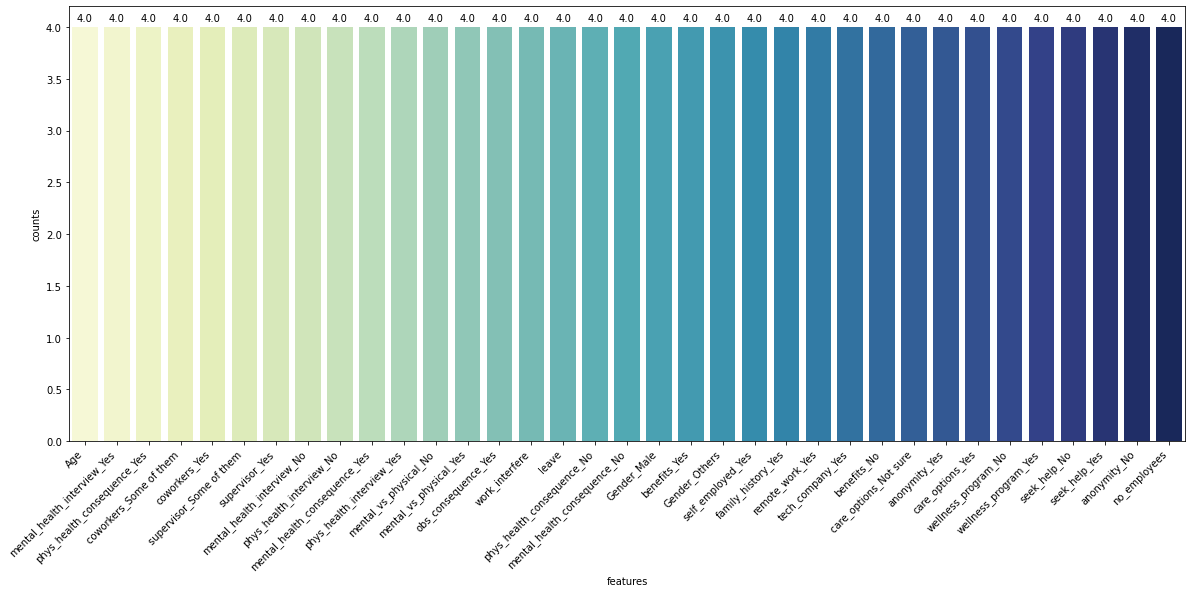

In [207]:
plt.figure(figsize=(20,8))
features_counts = feature_names['counts'].sort_values(ascending=False).to_frame()
ax = sns.barplot(x=features_counts.index, y='counts', data=features_counts,  palette="YlGnBu")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
ax = ax.set_xticklabels(features_counts.index, rotation = 45, ha="right")

# Modelling-Final 

In [208]:
score_card = pd.DataFrame(columns=['Model Name','Precision Score', 'Recall Score', 'f1-score','Accuracy Score','roc_auc_score'])
 
def update_scorecard(name,prec,recall,f1,acc,roc):
    global score_card
    score_card = score_card.append({'Model Name':name,'Precision Score': prec,'Recall Score': recall,
                                    'f1-score': f1,'Accuracy Score':acc,'roc_auc_score':roc},ignore_index = True)

In [209]:
ll=LabelEncoder()
y_label=pd.DataFrame(ll.fit_transform(y))


In [210]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_label, test_size=0.3, random_state=42)

In [211]:
update_scorecard('SMLR',0.740740,0.719794,0.7,0.710106,0.770198)

### Decison Tree  

In [212]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [213]:
test_pred = dt.predict(X_test)
train_pred = dt.predict(X_train)

print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       432

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875

              precision    recall  f1-score   support

           0       0.59      0.66      0.63       176
           1       0.67      0.60      0.63       200

    accuracy                           0.63       376
   macro avg       0.63      0.63      0.63       376
weighted avg       0.63      0.63      0.63       376



In [214]:
test_pred_prob = dt.predict_proba(X_test)
roc_auc_score(y_test,test_pred_prob[:,1])

0.6323863636363637

In [215]:
update_scorecard('Decision Tree',0.68,0.67,0.65,0.64,0.642727)

In [216]:
tuned_params = [{'criterion': ['entropy', 'gini'],
                'max_depth': range(2,14),
                 'min_samples_split':range(3,10),
                'max_leaf_nodes':range(2,10)}]

                     
dt_grid=GridSearchCV(estimator=DecisionTreeClassifier(random_state=10,),
                     param_grid=tuned_params,cv=5,scoring='f1')
dt_grid.fit(X_train,y_train)

dt_grid.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_leaf_nodes': 6,
 'min_samples_split': 3}

In [217]:
dt_tuned = dt_grid.best_estimator_

In [218]:
dt_tuned.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, min_samples_split=3,
                       random_state=10)

In [219]:
test_pred = dt_tuned.predict(X_test)
train_pred = dt_tuned.predict(X_train)

print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       443
           1       0.74      0.79      0.76       432

    accuracy                           0.76       875
   macro avg       0.76      0.76      0.76       875
weighted avg       0.76      0.76      0.76       875

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       176
           1       0.75      0.81      0.77       200

    accuracy                           0.75       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376



In [220]:
test_pred_prob = dt_tuned.predict_log_proba(X_test)
roc_auc_score(y_test,test_pred_prob[:,1])

0.7754403409090909

In [221]:
update_scorecard('Decision Tree(tuned)',0.75,0.81,0.77,0.75,0.77544)

### BAGGING -RANDOM FOREST

In [222]:
random_base_model=RandomForestClassifier(random_state=10)
random_base_model=random_base_model.fit(X_train,y_train)

In [223]:
def con_mat(model,x_test,y_test):
    pred=model.predict(x_test)
    m=confusion_matrix(y_test,pred)
    tn=m[0,0]
    fp=m[0,1]
    fn=m[1,0]
    tp=m[1,1]
    print(sns.heatmap(con_mat(model,x_test,y_test,fmt='d',cbar=False,cmap='Purples')))

In [224]:
#check model performance

In [225]:
pred_test=random_base_model.predict(X_test)
pred_train=random_base_model.predict(X_train)

In [226]:
prob=random_base_model.predict_proba(X_test)

In [227]:
#confusion metrics

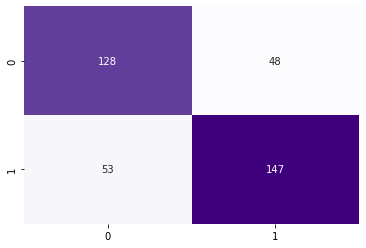

In [228]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cmap='Purples',cbar=False)
plt.show()

In [229]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

Accuracy 0.7313829787234043
F1-score 0.7443037974683544
Precison 0.7538461538461538
recall 0.735
kappa-score 0.46148610323312533


In [230]:
#classification report

In [231]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       432

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [232]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       176
           1       0.75      0.73      0.74       200

    accuracy                           0.73       376
   macro avg       0.73      0.73      0.73       376
weighted avg       0.73      0.73      0.73       376



In [233]:
roc=roc_auc_score(y_test,prob[:,1])
roc

0.7730823863636364

 From the above output, we can see that there is a difference between the train and test scores; 
thus, we can conclude that the random tree is over-fitted on the train data.

In [234]:
#lets tune the hyperparameters in the random forest , it helps to avoid the over-fitting of the tree.

In [235]:
## Tuning the DT model

tuned_params = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 20, 30, 50, 70, 90],
                     'max_depth': range(2,14,4)}]

                     
rf_grid=GridSearchCV(estimator=RandomForestClassifier(random_state=10,),
                     param_grid=tuned_params,cv=5,scoring='f1')
rf_grid.fit(X_train,y_train)

rf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}

In [236]:
#lets build the model using tuned params
rf_tune=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)
rf_tune.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=50,
                       random_state=10)

In [237]:
pred_train=rf_tune.predict(X_train)
pred_test=rf_tune.predict(X_test)
#prob_test=rf_tune.predict_proba(X_test)

In [238]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       443
           1       0.99      0.92      0.95       432

    accuracy                           0.95       875
   macro avg       0.96      0.95      0.95       875
weighted avg       0.96      0.95      0.95       875



In [239]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       176
           1       0.76      0.70      0.73       200

    accuracy                           0.72       376
   macro avg       0.72      0.72      0.72       376
weighted avg       0.73      0.72      0.72       376



In [240]:
#lets choose optimal value of threshold
prob_test=rf_tune.predict_proba(X_test)
#prob_test[:,1]

In [241]:

fpr,tpr,th=roc_curve(y_test,prob_test[:,1])
df_roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresh':th})
df_roc['youden']=df_roc['tpr']-df_roc['fpr']
df_roc.sort_values(by='youden',ascending=False)
#use thresh as 0.498

,fpr,tpr,thresh,youden
66,0.238636,0.695,0.507198,0.456364
70,0.255682,0.710,0.497144,0.454318
64,0.232955,0.685,0.513143,0.452045
68,0.250000,0.700,0.504153,0.450000
65,0.238636,0.685,0.512725,0.446364
...,...,...,...,...
139,0.926136,0.990,0.152196,0.063864
0,0.000000,0.000,1.953750,0.000000
142,1.000000,1.000,0.075391,0.000000
141,1.000000,0.995,0.079507,-0.005000


In [242]:
pred_test_roc=[0 if i <0.498 else 1 for i in prob_test[:,1]]
print(classification_report(y_test,pred_test_roc))

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       176
           1       0.76      0.70      0.73       200

    accuracy                           0.72       376
   macro avg       0.72      0.72      0.72       376
weighted avg       0.73      0.72      0.72       376



In [243]:
roc_auc_score(y_test,prob_test[:,1])

0.7870738636363636

In [244]:
# feature importance

In [245]:
df_rf_imp=pd.DataFrame({'feature':X_train.columns,'importance':rf_tune.feature_importances_})
df_rf_imp=df_rf_imp.sort_values(by='importance',ascending=False)

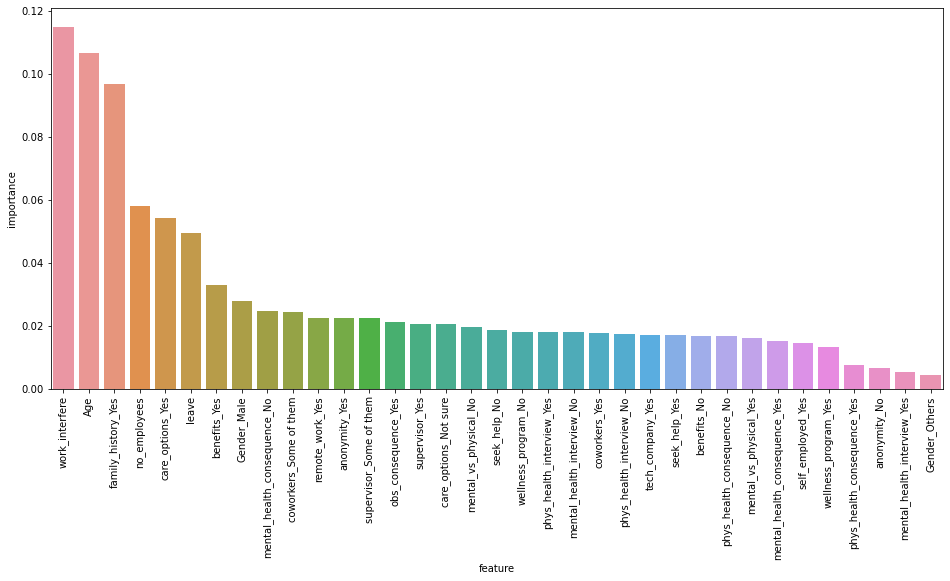

In [246]:
plt.figure(figsize=(16,7))
sns.barplot(df_rf_imp['feature'],df_rf_imp['importance'])
plt.xticks(rotation=90);

In [247]:
update_scorecard('random_base_model',precision,recall,f1_score,accuracy,roc)
update_scorecard('random_tune_model',0.72,0.72,0.72,0.72,0.790)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000


### BOOSTING TECHNIQUE - ADABOOSTING

In [248]:
ada_base_model=AdaBoostClassifier(random_state=10)
ada_base_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=10)

In [249]:
pred_train=ada_base_model.predict(X_train)
pred_test=ada_base_model.predict(X_test)
#prob_test=rf_tune.predict_proba(X_test)

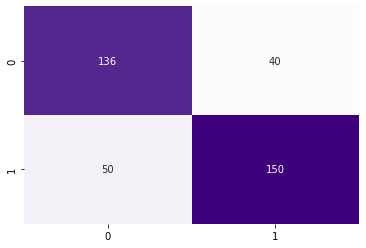

In [250]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cbar=False,cmap='Purples')
plt.show()

In [251]:

accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

Accuracy 0.7606382978723404
F1-score 0.7692307692307692
Precison 0.7894736842105263
recall 0.75
kappa-score 0.5209513023782559


In [252]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       443
           1       0.77      0.75      0.76       432

    accuracy                           0.77       875
   macro avg       0.77      0.77      0.77       875
weighted avg       0.77      0.77      0.77       875



In [253]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75       176
           1       0.79      0.75      0.77       200

    accuracy                           0.76       376
   macro avg       0.76      0.76      0.76       376
weighted avg       0.76      0.76      0.76       376



In [254]:
prob_test=ada_base_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob_test[:,1])

In [255]:
# the model is performing well on both train and test data set  but it can be further improved 

In [256]:
update_scorecard('ada_base_model',precision,recall,f1_score,accuracy,roc)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989


In [257]:
# lets tune model
params=[{'n_estimators': [10, 20, 30, 50, 70, 90],
         'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
        }]
ada_grid=GridSearchCV(estimator=AdaBoostClassifier(random_state=10),param_grid=params,cv=3,scoring='f1')
ada_grid.fit(X_train,y_train)
ada_grid.best_params_

{'learning_rate': 0.3, 'n_estimators': 10}

In [258]:
# build model using tuned params
ada_tune=AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)
ada_tune.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=10, random_state=10)

In [259]:
pred_train=ada_tune.predict(X_train)
pred_test=ada_tune.predict(X_test)

In [260]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       443
           1       0.76      0.73      0.74       432

    accuracy                           0.75       875
   macro avg       0.75      0.75      0.75       875
weighted avg       0.75      0.75      0.75       875



In [261]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       176
           1       0.76      0.77      0.76       200

    accuracy                           0.75       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376



In [262]:
#lets choose optimal value of threshold
prob_test=ada_tune.predict_proba(X_test)
#prob_test[:,1]
fpr,tpr,th=roc_curve(y_test,prob_test[:,1])
df_roc_ada=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresh':th})
df_roc_ada['youden']=df_roc_ada['tpr']-df_roc_ada['fpr']
df_roc_ada.sort_values(by='youden',ascending=False).head(5)
#use thresh as 0.517

,fpr,tpr,thresh,youden
14,0.278409,0.770,0.517848,0.491591
16,0.329545,0.815,0.473271,0.485455
15,0.329545,0.810,0.495877,0.480455
12,0.210227,0.675,0.529115,0.464773
13,0.227273,0.680,0.523408,0.452727


In [263]:
pred_test_roc=[0 if i <0.517 else 1 for i in prob_test[:,1]]
print(classification_report(y_test,pred_test_roc))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       176
           1       0.76      0.77      0.76       200

    accuracy                           0.75       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376



In [264]:
roc_auc_score(y_test,prob_test[:,1])

0.7952556818181817

In [265]:
update_scorecard('ada_tune_model',0.75,0.75,0.75,0.75,0.7952)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989
6,ada_tune_model,0.750000,0.750000,0.750000,0.750000,0.795200


In [266]:
df_ada_imp=pd.DataFrame({'feature':X_train.columns,'importance':ada_tune.feature_importances_})
df_ada_imp=df_ada_imp.sort_values(by='importance',ascending=False)


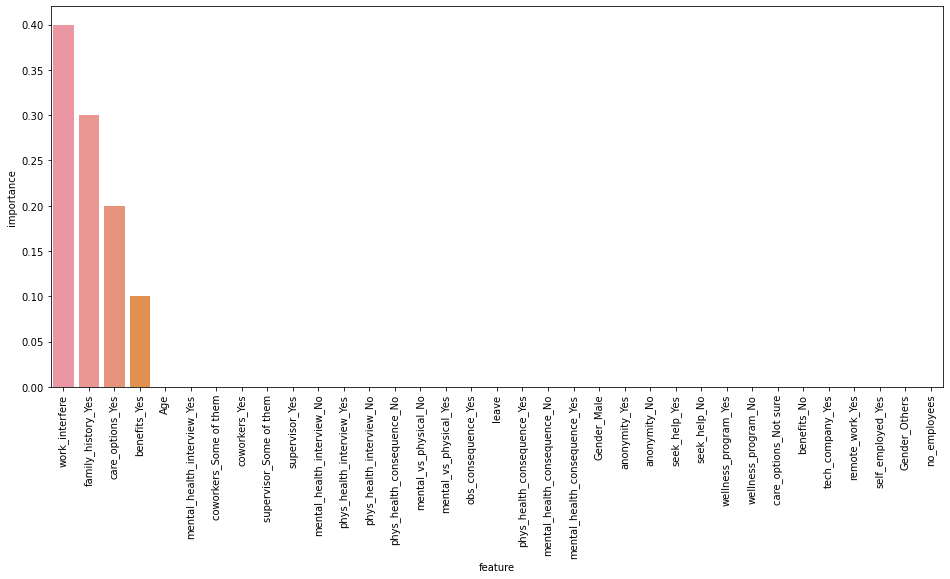

In [267]:
plt.figure(figsize=(16,7))
sns.barplot(df_ada_imp['feature'],df_ada_imp['importance'])
plt.xticks(rotation=90);

In [268]:
X_train_1 = X_train.drop(['work_interfere','family_history_Yes','care_options_Yes','benefits_Yes'],axis=1)
X_test_1 = X_test.drop(['work_interfere','family_history_Yes','care_options_Yes','benefits_Yes'],axis=1)

In [269]:
# build model to see impact of other features 
ada_feat=AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)
ada_feat.fit(X_train_1,y_train)

AdaBoostClassifier(learning_rate=0.3, n_estimators=10, random_state=10)

In [270]:
pred_train=ada_feat.predict(X_train_1)
pred_test=ada_feat.predict(X_test_1)

print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67       443
           1       0.66      0.57      0.61       432

    accuracy                           0.64       875
   macro avg       0.64      0.64      0.64       875
weighted avg       0.64      0.64      0.64       875



In [271]:
df_ada_feat=pd.DataFrame({'feature':X_train_1.columns,'importance':ada_feat.feature_importances_})
df_ada_feat=df_ada_feat.sort_values(by='importance',ascending=False)


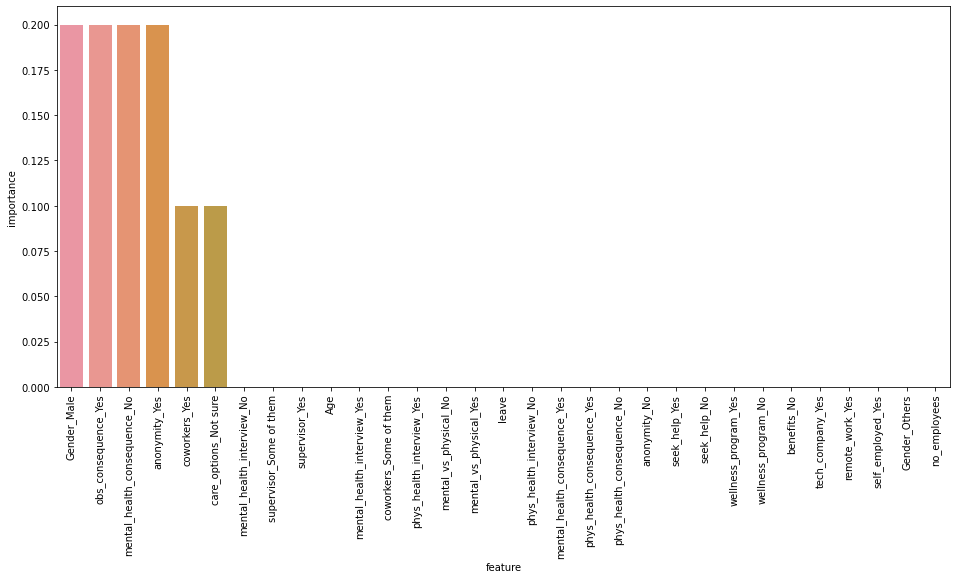

In [272]:
plt.figure(figsize=(16,7))
sns.barplot(df_ada_feat['feature'],df_ada_feat['importance'])
plt.xticks(rotation=90);

In [273]:
#lets build model using imp features

In [274]:
sig_ada=df_ada_imp[df_ada_imp['importance']>0]['feature']
sig_ada

32        work_interfere
4     family_history_Yes
10      care_options_Yes
8           benefits_Yes
Name: feature, dtype: object

In [275]:
x_train_ada=X_train[sig_ada]
x_test_ada=X_test[sig_ada]

In [276]:
ada_sig_model=AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)
ada_sig_model.fit(x_train_ada,y_train)


AdaBoostClassifier(learning_rate=0.3, n_estimators=10, random_state=10)

In [277]:
pred_test=ada_sig_model.predict(x_test_ada)

In [278]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       176
           1       0.76      0.77      0.76       200

    accuracy                           0.75       376
   macro avg       0.75      0.75      0.75       376
weighted avg       0.75      0.75      0.75       376



In [279]:
prob=ada_sig_model.predict_proba(x_test_ada)
roc_auc_score(y_test,prob[:,1])

0.7952556818181817

In [280]:
update_scorecard('ada_significant_feature_model',0.75,0.75,0.75,0.75,0.7952)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989
6,ada_tune_model,0.750000,0.750000,0.750000,0.750000,0.795200
7,ada_significant_feature_model,0.750000,0.750000,0.750000,0.750000,0.795200


### XGBOOST

In [281]:
xgboost_base_model=XGBClassifier(eval_metric='error')
xgboost_base_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='error', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [282]:
pred_train=xgboost_base_model.predict(X_train)
pred_test=xgboost_base_model.predict(X_test)

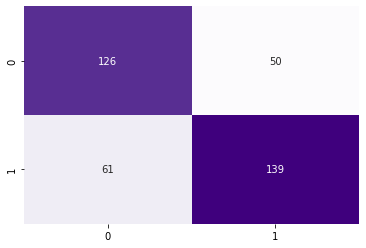

In [283]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,cmap='Purples',cbar=False,fmt='d')
plt.show()

In [284]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=(2*recall*precision)/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

Accuracy 0.7047872340425532
F1-score 0.7146529562982005
Precison 0.7354497354497355
recall 0.695
kappa-score 0.4093739386391939


In [285]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00       432

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



In [286]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       176
           1       0.74      0.69      0.71       200

    accuracy                           0.70       376
   macro avg       0.70      0.71      0.70       376
weighted avg       0.71      0.70      0.71       376



From the above output, we can see that there is a difference between the train and test scores; thus, we can conclude that the random tree is over-fitted on the train data.

In [287]:
prob=xgboost_base_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])
roc

0.7448295454545455

In [288]:
update_scorecard('xgboost_base_model',precision,recall,f1_score,accuracy,roc)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989
6,ada_tune_model,0.750000,0.750000,0.750000,0.750000,0.795200
7,ada_significant_feature_model,0.750000,0.750000,0.750000,0.750000,0.795200
8,xgboost_base_model,0.735450,0.695000,0.714653,0.704787,0.744830


In [289]:
# lets tune the model to find optimal parameters for better performance

In [290]:
tuning_params = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}

xgb_grid = GridSearchCV(estimator = XGBClassifier(eval_metric='error'), param_grid = tuning_params, cv = 3, scoring = 'roc_auc').fit(X_train, y_train)

xgb_grid.best_params_

{'gamma': 4, 'learning_rate': 0.5, 'max_depth': 3}

In [291]:
#model build using tuned params
xgb_tuned = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                max_depth = xgb_grid.best_params_.get('max_depth'),
                gamma = xgb_grid.best_params_.get('gamma')).fit(X_train, y_train)

ypred_train_tuned = xgb_tuned.predict(X_train)
ypred_tuned = xgb_tuned.predict(X_test)
ypred_prob_tuned =xgb_tuned.predict_proba(X_test)[:,1]

[00:36:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [292]:
# Train report
print(classification_report(y_train,ypred_train_tuned))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       443
           1       0.78      0.79      0.78       432

    accuracy                           0.78       875
   macro avg       0.78      0.78      0.78       875
weighted avg       0.78      0.78      0.78       875



In [293]:
# Test report
print(classification_report(y_test,ypred_tuned))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       176
           1       0.75      0.77      0.76       200

    accuracy                           0.74       376
   macro avg       0.74      0.74      0.74       376
weighted avg       0.74      0.74      0.74       376



In [294]:
prob=xgb_tuned.predict_proba(X_test)
roc_auc_score(y_test,prob[:,1])

0.781065340909091

In [295]:
update_scorecard('xgb_tuned_model',0.74,0.74,0.74,0.74,0.781)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989
6,ada_tune_model,0.750000,0.750000,0.750000,0.750000,0.795200
7,ada_significant_feature_model,0.750000,0.750000,0.750000,0.750000,0.795200
8,xgboost_base_model,0.735450,0.695000,0.714653,0.704787,0.744830
9,xgb_tuned_model,0.740000,0.740000,0.740000,0.740000,0.781000


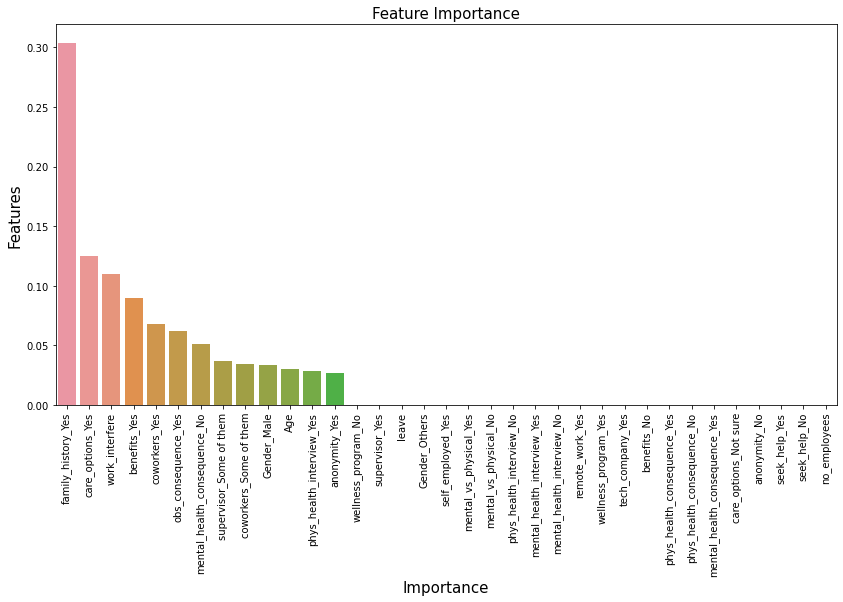

In [347]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_tuned.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)

plt.figure(figsize=(14,7))
sns.barplot(y = 'Importance', x = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

### Stacking

In [297]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 ('ada',AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

ypred_train_tuned = stack_model.predict(X_train)
ypred_tuned = stack_model.predict(X_test)
ypred_prob_tuned =stack_model.predict_proba(X_test)[:,1]

In [298]:
# Train report
print(classification_report(y_train,ypred_train_tuned))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       443
           1       0.79      0.81      0.80       432

    accuracy                           0.80       875
   macro avg       0.80      0.80      0.80       875
weighted avg       0.80      0.80      0.80       875



In [299]:
# Test report
print(classification_report(y_test,ypred_tuned))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       176
           1       0.72      0.65      0.68       200

    accuracy                           0.68       376
   macro avg       0.68      0.68      0.68       376
weighted avg       0.69      0.68      0.68       376



In [300]:
prob=stack_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])

In [301]:
update_scorecard('Stacked(RF,ada,XG)',0.68,0.68,0.68,0.68,roc)

In [302]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 ('ada',AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)),
                 ('smlr', smlr.SMLR()),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 444.022329
SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 30
# of iterations: 1,  FuncValue: 360.799459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 347.773489
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 31
# of iterations: 1,  FuncValue: 351.828459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 349.295356
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 350.524289


In [303]:
ypred_train_tuned = stack_model.predict(X_train)
ypred_tuned = stack_model.predict(X_test)
ypred_prob_tuned =stack_model.predict_proba(X_test)[:,1]

# Train report
print(classification_report(y_train,ypred_train_tuned))

# Test report
print(classification_report(y_test,ypred_tuned))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       443
           1       0.83      0.82      0.82       432

    accuracy                           0.83       875
   macro avg       0.83      0.83      0.83       875
weighted avg       0.83      0.83      0.83       875

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       176
           1       0.77      0.68      0.72       200

    accuracy                           0.72       376
   macro avg       0.72      0.72      0.72       376
weighted avg       0.73      0.72      0.72       376



In [304]:
prob=stack_model.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])

In [305]:
update_scorecard('Stacked(RF,ada,SMLR,XG)',0.77,0.68,0.72,0.72,roc)

In [306]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 #('ada',AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)),
                 ('smlr', smlr.SMLR()),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 444.022329
SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 30
# of iterations: 1,  FuncValue: 360.799459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 347.773489
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 31
# of iterations: 1,  FuncValue: 351.828459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 349.295356
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 350.524289


In [307]:
ypred_train_tuned = stack_model.predict(X_train)
ypred_tuned = stack_model.predict(X_test)
ypred_prob_tuned =stack_model.predict_proba(X_test)[:,1]

# Train report
print(classification_report(y_train,ypred_train_tuned))

# Test report
print(classification_report(y_test,ypred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       443
           1       0.83      0.82      0.83       432

    accuracy                           0.83       875
   macro avg       0.83      0.83      0.83       875
weighted avg       0.83      0.83      0.83       875

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       176
           1       0.78      0.68      0.73       200

    accuracy                           0.73       376
   macro avg       0.73      0.73      0.73       376
weighted avg       0.73      0.73      0.73       376



In [308]:
stack_model.feature_names_in_

array(['Age', 'Gender_Male', 'Gender_Others', 'self_employed_Yes',
       'family_history_Yes', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes',
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_No', 'phys_health_interview_Yes',
       'mental_vs_physical_No', 'mental_vs_physical_Yes',
       'obs_consequence_Yes', 'work_interfere', 'leave', 'no_employees'],
      dtype=object)

In [309]:
stack_model.n_features_in_

35

In [310]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred_test  =  classifier.predict(X_test)
y_pred_train  =  classifier.predict(X_train)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71       443
           1       0.72      0.59      0.65       432

    accuracy                           0.68       875
   macro avg       0.69      0.68      0.68       875
weighted avg       0.69      0.68      0.68       875

              precision    recall  f1-score   support

           0       0.62      0.81      0.70       176
           1       0.77      0.56      0.65       200

    accuracy                           0.68       376
   macro avg       0.70      0.69      0.68       376
weighted avg       0.70      0.68      0.68       376



In [311]:
clf = SVC(kernel='linear', C = 1.0,)
clf.fit(X_train,y_train)

SVC(kernel='linear')

In [312]:
y_pred_test  =  clf.predict(X_test)
y_pred_train  =  clf.predict(X_train)
print(classification_report(y_train,y_pred_train))
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.78      0.76       443
           1       0.77      0.73      0.75       432

    accuracy                           0.76       875
   macro avg       0.76      0.76      0.76       875
weighted avg       0.76      0.76      0.76       875

              precision    recall  f1-score   support

           0       0.67      0.73      0.70       176
           1       0.74      0.68      0.71       200

    accuracy                           0.70       376
   macro avg       0.70      0.70      0.70       376
weighted avg       0.71      0.70      0.70       376



In [313]:
SVC().get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

### Random-forest with relief

In [314]:
# selected important features using relief
X_train_rf = X_train[reliefF_features]
X_test_rf = X_test[reliefF_features]

In [315]:
random_feat=RandomForestClassifier(random_state=10)
random_feat=random_base_model.fit(X_train_rf,y_train)

In [316]:
#check model performance

pred_test=random_base_model.predict(X_test_rf)
pred_train=random_base_model.predict(X_train_rf)

prob=random_base_model.predict_proba(X_test_rf)

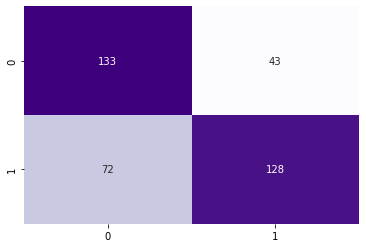

In [317]:
#confusion metrics

m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cmap='Purples',cbar=False)
plt.show()

In [318]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

Accuracy 0.6941489361702128
F1-score 0.6900269541778975
Precison 0.7485380116959064
recall 0.64
kappa-score 0.39180825925509166


In [319]:
#classification report

print(classification_report(y_train,pred_train))

print(classification_report(y_test,pred_test))

roc=roc_auc_score(y_test,prob[:,1])
roc

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       443
           1       0.77      0.62      0.69       432

    accuracy                           0.72       875
   macro avg       0.73      0.72      0.72       875
weighted avg       0.73      0.72      0.72       875

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       176
           1       0.75      0.64      0.69       200

    accuracy                           0.69       376
   macro avg       0.70      0.70      0.69       376
weighted avg       0.70      0.69      0.69       376



0.7130255681818182

In [320]:
update_scorecard('random_with_reliefF',0.74419,0.64,0.688,0.691489,0.711491)
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989
6,ada_tune_model,0.750000,0.750000,0.750000,0.750000,0.795200
7,ada_significant_feature_model,0.750000,0.750000,0.750000,0.750000,0.795200
8,xgboost_base_model,0.735450,0.695000,0.714653,0.704787,0.744830
9,xgb_tuned_model,0.740000,0.740000,0.740000,0.740000,0.781000


### Ada with reliefF features

In [321]:
ada_base_model=AdaBoostClassifier(random_state=10)
ada_base_model.fit(X_train_rf,y_train)

AdaBoostClassifier(random_state=10)

In [322]:
pred_train=ada_base_model.predict(X_train_rf)
pred_test=ada_base_model.predict(X_test_rf)
#prob_test=rf_tune.predict_proba(X_test)

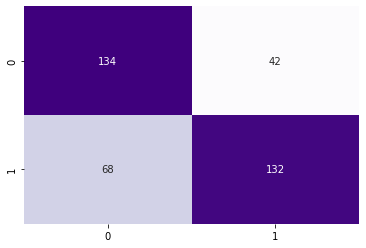

In [323]:
m=confusion_matrix(y_test,pred_test)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cbar=False,cmap='Purples')
plt.show()

In [324]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,pred_test))

Accuracy 0.7074468085106383
F1-score 0.7058823529411765
Precison 0.7586206896551724
recall 0.66
kappa-score 0.4176616355034918


In [325]:
print(classification_report(y_train,pred_train))

print(classification_report(y_test,pred_test))

prob_test=ada_base_model.predict_proba(X_test_rf)
roc=roc_auc_score(y_test,prob_test[:,1])
roc

              precision    recall  f1-score   support

           0       0.67      0.76      0.71       443
           1       0.71      0.61      0.66       432

    accuracy                           0.69       875
   macro avg       0.69      0.69      0.68       875
weighted avg       0.69      0.69      0.68       875

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       176
           1       0.76      0.66      0.71       200

    accuracy                           0.71       376
   macro avg       0.71      0.71      0.71       376
weighted avg       0.71      0.71      0.71       376



0.7412073863636363

In [326]:
update_scorecard('ada_with_reliefF',precision,recall,f1_score,accuracy,roc)

In [327]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 ('dt',DecisionTreeClassifier(max_depth=4, max_leaf_nodes=6, min_samples_split=3,random_state=10)),
                 ('smlr', smlr.SMLR()),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model_dt = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

ypred_train_tuned = stack_model.predict(X_train)
ypred_tuned = stack_model.predict(X_test)
ypred_prob_tuned =stack_model.predict_proba(X_test)[:,1]

# Train report
print(classification_report(y_train,ypred_train_tuned))

# Test report
print(classification_report(y_test,ypred_tuned))

SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 444.022329
SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 30
# of iterations: 1,  FuncValue: 360.799459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 347.773489
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 31
# of iterations: 1,  FuncValue: 351.828459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 349.295356
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 350.524289
              precision    recall  f1-score   support

           0 

### Compare Result

In [348]:
score_card

,Model Name,Precision Score,Recall Score,f1-score,Accuracy Score,roc_auc_score
0,SMLR,0.740740,0.719794,0.700000,0.710106,0.770198
1,Decision Tree,0.680000,0.670000,0.650000,0.640000,0.642727
2,Decision Tree(tuned),0.750000,0.810000,0.770000,0.750000,0.775440
3,random_base_model,0.753846,0.735000,0.744304,0.731383,0.773082
4,random_tune_model,0.720000,0.720000,0.720000,0.720000,0.790000
5,ada_base_model,0.789474,0.750000,0.769231,0.760638,0.786989
6,ada_tune_model,0.750000,0.750000,0.750000,0.750000,0.795200
7,ada_significant_feature_model,0.750000,0.750000,0.750000,0.750000,0.795200
8,xgboost_base_model,0.735450,0.695000,0.714653,0.704787,0.744830
9,xgb_tuned_model,0.740000,0.740000,0.740000,0.740000,0.781000


In [ ]:
# Of all models, Adaboosting model has better performance metrics than other models.
# But while looking at the importance of features, it is only considering few features.
# Even after removing the highly affecting features, it only gives importance to few features. 
# Hence it is not capturing the dataset completely.

# So we select stacked model WITH SMLR, RANDOM FOREST AND XGBOOST. FINAL-KNN as final model. 
# The model performace is good and is considering many features

### Final Model

### STACKED MODEL WITH SMLR, RANDOM FOREST AND XGBOOST. FINAL-KNN

In [328]:
# consider the various algorithms as base learners
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 #('ada',AdaBoostClassifier(learning_rate=0.3,n_estimators=10,random_state=10)),
                 ('smlr', smlr.SMLR()),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model_final = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)

SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 444.022329
SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 30
# of iterations: 1,  FuncValue: 360.799459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 347.773489
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 31
# of iterations: 1,  FuncValue: 351.828459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 349.295356
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 350.524289


In [329]:
ypred_train_tuned = stack_model_final.predict(X_train)
ypred_tuned = stack_model_final.predict(X_test)
ypred_prob_tuned =stack_model_final.predict_proba(X_test)[:,1]

# Train report
print(classification_report(y_train,ypred_train_tuned))

# Test report
print(classification_report(y_test,ypred_tuned))



              precision    recall  f1-score   support

           0       0.83      0.84      0.83       443
           1       0.83      0.82      0.83       432

    accuracy                           0.83       875
   macro avg       0.83      0.83      0.83       875
weighted avg       0.83      0.83      0.83       875

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       176
           1       0.78      0.68      0.73       200

    accuracy                           0.73       376
   macro avg       0.73      0.73      0.73       376
weighted avg       0.73      0.73      0.73       376



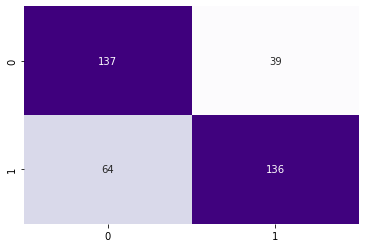

In [330]:
m=confusion_matrix(y_test,ypred_tuned)
tn=m[0,0]
fp=m[0,1]
fn=m[1,0]
tp=m[1,1]
sns.heatmap(m,annot=True,fmt='d',cbar=False,cmap='Purples')
plt.show()

In [331]:
accuracy=(tn+tp)/(tn+tp+fn+fp)
precision=tp/(tp+fp)
recall=tp/(tp+fn)
f1_score=2*recall*precision/(recall+precision)
print('Accuracy',accuracy)
print('F1-score',f1_score)
print('Precison',precision)
print('recall',recall)
print('kappa-score',cohen_kappa_score(y_test,ypred_tuned))

Accuracy 0.726063829787234
F1-score 0.7253333333333333
Precison 0.7771428571428571
recall 0.68
kappa-score 0.45453521126760565


In [332]:
prob=stack_model_final.predict_proba(X_test)
roc=roc_auc_score(y_test,prob[:,1])
print('roc score:',roc)

roc score: 0.7578977272727273


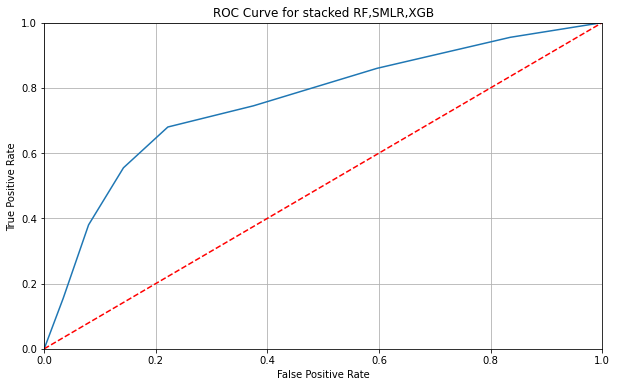

In [333]:
fpr,tpr,th=roc_curve(y_test,prob[:,1])

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.title('ROC Curve for stacked RF,SMLR,XGB',fontsize=12)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('True')
plt.show()

In [334]:
print('No of features selected in training the model :',stack_model.n_features_in_)
stack_model.feature_names_in_

No of features selected in training the model : 35


array(['Age', 'Gender_Male', 'Gender_Others', 'self_employed_Yes',
       'family_history_Yes', 'remote_work_Yes', 'tech_company_Yes',
       'benefits_No', 'benefits_Yes', 'care_options_Not sure',
       'care_options_Yes', 'wellness_program_No', 'wellness_program_Yes',
       'seek_help_No', 'seek_help_Yes', 'anonymity_No', 'anonymity_Yes',
       'mental_health_consequence_No', 'mental_health_consequence_Yes',
       'phys_health_consequence_No', 'phys_health_consequence_Yes',
       'coworkers_Some of them', 'coworkers_Yes',
       'supervisor_Some of them', 'supervisor_Yes',
       'mental_health_interview_No', 'mental_health_interview_Yes',
       'phys_health_interview_No', 'phys_health_interview_Yes',
       'mental_vs_physical_No', 'mental_vs_physical_Yes',
       'obs_consequence_Yes', 'work_interfere', 'leave', 'no_employees'],
      dtype=object)

In [335]:
update_scorecard('Stacked (RF,SMLR,XG)',0.777143,0.68,0.725333,0.726064,roc)

From the above importance’s of RF & XG, we may say that the employees who have faced work interference and have a family history of mental illness are prone to have mental health issue. We can also say that with age the mental mealth is affected.

## Bootstrapping 

In [338]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [339]:
# restructure data for input into model
X_train_bs = X_train.values.reshape((len(X_train.values), 35))
y_train_bs = y_train.values.ravel()
X_test_bs = X_test.values.reshape((len(X_test.values), 35))
y_test_bs = y_test.values.ravel()


In [342]:
# train model
base_learners = [('rf', RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=10,random_state=10)),
                 ('smlr', smlr.SMLR()),
                 ('xgb', XGBClassifier(learning_rate = 0.5,max_depth = 3,gamma = 4,eval_metric='error'))]

final = KNeighborsClassifier(metric='euclidean',n_neighbors=7)

stack_model_final = StackingClassifier(estimators = base_learners, final_estimator = final).fit(X_train, y_train)


# bootstrap predictions
accuracy_stack = []
n_iterations = 1000
for i in range(n_iterations):
    X_bs, y_bs = resample(X_train_bs, y_train_bs, replace=True)
    # make predictions
    y_hat = stack_model_final.predict(X_bs)
    # evaluate model
    score = accuracy_score(y_bs, y_hat)
    accuracy_stack.append(score)
    
print(np.mean(accuracy))

SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 444.022329
SMLR (sparse multinomial logistic regression)
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 30
# of iterations: 1,  FuncValue: 360.799459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 33
# of iterations: 1,  FuncValue: 347.773489
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 31
# of iterations: 1,  FuncValue: 351.828459
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 349.295356
SMLR (sparse multinomial logistic regression)
# of iterations: 1,  # of effective dimensions: 34
# of iterations: 1,  FuncValue: 350.524289
0.7683245714285714


In [343]:
# get median
median_stack = np.percentile(accuracy_stack, 50)

# get 95% interval
alpha = 100-95
lower_ci = np.percentile(accuracy_stack, alpha/2)
upper_ci = np.percentile(accuracy_stack, 100-alpha/2)

print(f"Model accuracy is reported on the test set. 1000 bootstrapped samples " 
      f"were used to calculate 95% confidence intervals.\n"
      f"Median accuracy is {median_stack:.2f} with a 95% a confidence "
      f"interval of [{lower_ci:.2f},{upper_ci:.2f}].")


Model accuracy is reported on the test set. 1000 bootstrapped samples were used to calculate 95% confidence intervals.
Median accuracy is 0.83 with a 95% a confidence interval of [0.81,0.85].


Decision criteria:<br>
While hyper tuning the parameters, we focus on reducing False Negative i.e, the employee is suffering from mental illness and the model predicts him/her as healthy. This will be a loss employee. At the same time the accuracy of the model should be high.  